### Import the dataset's with requirments libarires

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [2]:
netflix = pd.read_csv('netflix_titles.csv')
amazon = pd.read_csv('amazon_prime_titles.csv')
disney = pd.read_csv('disney_plus_titles.csv')

In [3]:
print(netflix.shape)

(8807, 12)


In [4]:
print(amazon.shape)

(9668, 12)


In [5]:
print(disney.shape)

(1450, 12)


In [82]:
netflix.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
332,s333,Movie,Deep Blue Sea,Renny Harlin,"Thomas Jane, Saffron Burrows, Samuel L. Jackso...","United States, Mexico","August 1, 2021",1999,R,105 min,"Action & Adventure, Horror Movies, Sci-Fi & Fa...",Scientists conduct research on sharks in searc...
6793,s6794,Movie,Fracture,Gregory Hoblit,"Anthony Hopkins, Ryan Gosling, David Strathair...","United States, Germany","April 1, 2019",2007,R,113 min,"Dramas, Thrillers","Ted Crawford, who allegedly attempted to murde..."
7158,s7159,Movie,Kaabil,Sanjay Gupta,"Hrithik Roshan, Yami Gautam, Ronit Roy, Rohit ...",India,"June 25, 2017",2017,TV-14,139 min,"Dramas, International Movies",The happy life of a young blind couple is shat...
454,s455,Movie,Cheech & Chong's Still Smokin,Tommy Chong,"Cheech Marin, Tommy Chong, Susan Hahn, Carol v...",NaN,"July 15, 2021",1983,TV-MA,91 min,"Comedies, Cult Movies",Stoner comedians Cheech Marin and Tommy Chong ...
2784,s2785,TV Show,J-Style Trip,NaN,"Jay Chou, Jam Hsiao, JJ Lin, Will Tsai, Chen C...","Taiwan, China","March 22, 2020",2020,TV-14,1 Season,"International TV Shows, Reality TV",Megastar Jay Chou joins his A-list friends in ...


In [83]:
amazon.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5632,s5633,Movie,False Paradise (Feature Length),Niyi Towolawi,NaN,NaN,NaN,2021,16+,94 min,Drama,A feature length version of the gritty web ser...
7829,s7830,Movie,A Fatal Inversion,Tim Fywell,"Douglas Hodge, Jeremy Northam",NaN,NaN,1992,16+,122 min,Drama,"In 1979, two bodies were buried in the grounds..."
2167,s2168,TV Show,Humans,NaN,"Gemma Chan, Colin Morgan, Tom Goodman-Hill, Ka...",NaN,NaN,2018,TV-14,3 Seasons,"Drama, Science Fiction, Suspense","In Series 3 of the hit sci-fi drama, a year ha..."
8934,s8935,Movie,Cult Following,Matt Hartley,"Garrett Marchbank, Clem Darling, Jeannie Elise...",NaN,NaN,2021,16+,87 min,"Action, Horror","Distinguished author and cult expert, Robert R..."
8520,s8521,Movie,Wings Over Everest,Fay Yu,"Jingchu Zhang, Kôji Yakusho, Po-Hung Lin, Vict...",NaN,NaN,2019,13+,110 min,"Action, Drama",When a plane carrying important documents cras...


In [84]:
disney.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
159,s160,TV Show,Disney The Owl House,NaN,"Sarah-Nicole Robles, Wendie Malick, Alex Hirsc...","United States, United Kingdom","July 21, 2021",2020,TV-Y7,2 Seasons,"Action-Adventure, Animation, Anime",Luz stumbles upon a portal to a magical new wo...
1276,s1277,Movie,The Fox and the Hound 2,Jim Kammerud,"Reba McEntire, Patrick Swayze, Jonah Bobo, Har...",United States,"November 12, 2019",2006,G,73 min,"Action-Adventure, Animation, Buddy",Tod and Copper's friendship is put to the test.
664,s665,Movie,Hacksaw,Larry Lansburgh,"Tab Hunter, Victor Millan, Ray Teal, Russ McCu...",United States,"January 1, 2020",1971,TV-PG,89 min,"Animals & Nature, Family, Sports",A wilderness guide sets out to catch a legenda...
1379,s1380,Movie,Toy Story 3,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Don Rickles...",United States,"November 12, 2019",2010,G,103 min,"Animation, Comedy, Drama","Woody, Buzz and the gang return for more adven..."
365,s366,Movie,Home Alone 2: Lost in New York,Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",United States,"November 13, 2020",1992,PG,121 min,"Comedy, Family",Kevin is home alone in NYC but won't be for lo...


## Filter the every data with Movies & TV Shows

In [85]:
netflix_shows=netflix[netflix['type']=='TV Show']
netflix_movies=netflix[netflix['type']=='Movie']

amazon_movies=amazon[amazon['type']=='Movie']
amazon_shows=amazon[amazon['type']=='TV Show']

disney_movies=disney[disney['type']=='Movie']
disney_shows=disney[disney['type']=='TV Show']

In [86]:
netflix_shows.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
758,s759,TV Show,Feel Good,Ally Pankiw,"Mae Martin, Charlotte Ritchie, Lisa Kudrow, So...",United Kingdom,"June 4, 2021",2021,TV-MA,2 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",Stand-up comic Mae Martin navigates a passiona...
6519,s6520,TV Show,Comedy Bang! Bang!,NaN,"Scott Aukerman, Reggie Watts",United States,"December 28, 2016",2016,TV-14,5 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies",Scott Aukerman brings his popular podcast Come...
1756,s1757,TV Show,LEGO Jurassic World: Legend of Isla Nublar,NaN,NaN,United States,"November 1, 2020",2019,TV-Y,1 Season,Kids' TV,"At Jurassic Park, a velociraptor handler and a..."
3799,s3800,TV Show,She's Gotta Have It,NaN,"DeWanda Wise, Cleo Anthony, Lyriq Bent, Anthon...",United States,"May 24, 2019",2018,TV-MA,2 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",Nola Darling struggles to stay true to herself...
2012,s2013,TV Show,The Barrier,NaN,"Unax Ugalde, Olivia Molina, Eleonora Wexler, A...",Spain,"September 11, 2020",2020,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",One family’s fight for survival in a future dy...


In [87]:
netflix_movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4909,s4910,Movie,Holy Goalie,Curro Velázquez,"Karra Elejalde, Alain Hernández, Juan Manuel M...",Spain,"April 27, 2018",2017,TV-MA,95 min,"Comedies, International Movies, Sports Movies",A young priest coaches a team of uncoordinated...
262,s263,Movie,Untold: Deal With the Devil,Laura Brownson,NaN,NaN,"August 18, 2021",2021,TV-MA,78 min,"Documentaries, LGBTQ Movies, Sports Movies",Christy Martin broke boundaries and noses as s...
7372,s7373,Movie,Madaari,Nishikant Kamat,"Irrfan Khan, Jimmy Shergill, Vishesh Bansal, T...",India,"February 17, 2017",2016,TV-14,134 min,"Dramas, Independent Movies, International Movies",A bridge under construction collapses in Mumba...
1985,s1986,Movie,Horrid Henry's Gross Day Out,Gary Andrews,"Lizzie Waterworth-Santo, Emma Tate, Sue Elliot...",United Kingdom,"September 17, 2020",2020,TV-Y,61 min,"Children & Family Movies, Comedies",Worlds collide when Henry makes plans to spend...
2478,s2479,Movie,Modest Heroes: Ponoc Short Films Theatre,"Hiromasa Yonebayashi, Yoshiyuki Momose, Akihik...","Fumino Kimura, Rio Suzuki, Machiko Ono, Sota S...",Japan,"May 22, 2020",2018,PG,54 min,"Anime Features, Children & Family Movies",Two underwater siblings surviving on their own...


In [88]:
amazon_movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7351,s7352,Movie,The Bedroom Window,Curtis Hanson,"Steve Guttenberg, Elizabeth McGovern, Isabelle...",NaN,NaN,1987,R,113 min,Suspense,Terry is having an affair with his boss's wife...
5343,s5344,Movie,Unicorn,Tathagata Mukherjee,"Debolina Dutta, Charanjit Chakraborty",NaN,NaN,2021,16+,58 min,Drama,Apala was going through the overwhelming motio...
6162,s6163,Movie,Deva Rickshawala,SANJAY VERMA,"ABHINAV KUMAR, VERSA RITTU, SHASHI BHUSAN, RAM...",NaN,NaN,2021,16+,127 min,"Drama, Romance",This Story is about a educated boy who is forc...
151,s152,Movie,War of Likes,María Ripoll,"Ludwika Paleta, Regina Blandón, Manolo Cardona...",NaN,NaN,2021,16+,104 min,Comedy,In order to advance her career in the dynamic ...
3741,s3742,Movie,The Girl King,Mika Kaurismäki,"Malin Buska, Sarah Gadon, Michael Nyqvist",NaN,NaN,2015,18+,106 min,"Drama, LGBTQ, Romance","""The Girl King"" paints a portrait of the brill..."


In [89]:
amazon_shows.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5990,s5991,TV Show,HobbyKids Adventures by pocket.watch: The Comp...,NaN,"Griffin Burns, Cristina Milizia, Johnny Rose",NaN,"June 20, 2021",2019,ALL,2 Seasons,"Animation, Kids","Based on the popular family vlog, HobbyKidsTV,..."
1324,s1325,TV Show,Pinkfong! Baby Shark Special,NaN,NaN,NaN,NaN,2017,ALL,1 Season,Kids,Enjoy a collection of Baby Shark Special Songs...
3135,s3136,TV Show,Battlezone WWII: Nazi Blitzkrieg-The Battle Fo...,NaN,NaN,NaN,NaN,2015,13+,1 Season,"Action, Documentary, Special Interest",This Battlezone series features Blitzkrieg - t...
519,s520,TV Show,The Neighbors [English Subbed] (4K UHD),NaN,"Bracha van Doesburgh, Daan Schuurmans, Thijs R...",NaN,NaN,2016,TV-NR,1 Season,"Drama, Suspense",After a year Eva comes out of a coma. Still su...
9510,s9511,TV Show,Down Bad,NaN,"Jalen Moffitt, DeAndre Grafton, Michael Gordon...",NaN,NaN,2021,18+,1 Season,Drama,Down Bad follows three childhood friends with ...


In [90]:
disney_movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
50,s51,Movie,X-Men: First Class,Matthew Vaughn,"James McAvoy, Michael Fassbender, Rose Byrne, ...","United States, United Kingdom","November 5, 2021",2011,PG-13,132 min,"Action-Adventure, Science Fiction, Superhero","Following the classic mythology, X-Men: First ..."
1423,s1424,Movie,Z-O-M-B-I-E-S,Paul Hoen,"Milo Manheim, Meg Donnelly, Trevor Tordjman, K...",United States,"November 12, 2019",2018,TV-G,97 min,"Coming of Age, Musical, Science Fiction",A traditional high school must accept students...
877,s878,Movie,Emil and the Detectives,Peter Tewksbury,"Walter Slezak, Roger Mobley, Heinz Schubert, P...",United States,"November 12, 2019",1964,TV-PG,98 min,"Action-Adventure, Crime, Family","When a young boy's money is stolen, the search..."
104,s105,Movie,Nona,Louis Gonzales,NaN,NaN,"September 17, 2021",2021,G,9 min,"Animation, Comedy, Family",A grandmother's plan for a day alone is upende...
863,s864,Movie,Donald's Golf Game,Jack King,NaN,United States,"November 12, 2019",1938,TV-G,8 min,"Animation, Comedy, Family",Donald tries to impress his nephews at golfing...


In [91]:
disney_shows.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
377,s378,TV Show,The Mandalorian,NaN,"Pedro Pascal, Carl Weathers, Gina Carano, Omid...",United States,"October 30, 2020",2019,TV-14,2 Seasons,"Action-Adventure, Family, Science Fiction","After the fall of the Empire, a lone gunfighte..."
97,s98,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...
470,s471,TV Show,Super Robot Monkey Team Hyperforce Go!,NaN,"Greg Cipes, Kevin Michael\tRichardson, Tom Ken...","United States, Japan","July 17, 2020",2004,TV-Y7,2 Seasons,"Action-Adventure, Animation, Anime",Chiro and a team of five Robot Monkeys defend ...
532,s533,TV Show,Awesome Animals,NaN,NaN,NaN,"May 1, 2020",2017,TV-PG,1 Season,"Animals & Nature, Docuseries, Family",National Geographic Kids presents a natural hi...
1061,s1062,TV Show,Marvel's Inhumans,NaN,"Anson Mount, Serinda Swan, Ken Leung, Eme Ikwu...",United States,"November 12, 2019",2017,TV-14,1 Season,"Action-Adventure, Science Fiction, Superhero",The never-before-told adventure of the Royal F...


## Finding Mising Values

#### 1. Netflix data == director null rate: 29.91% || cast null rate: 9.37% || country null rate: 9.44% || date_added null rate: 0.11% || rating null rate: 0.05% || duration null rate: 0.03%

#### >> Netflix_Movies == director null rate: 2.13% || cast null rate: 5.39% || country null rate: 5.00% || rating null rate: 0.02% || duration null rate: 0.03%
#### >> Netflix_Shows == director null rate: 27.77% || cast null rate: 3.97% || country null rate: 4.44% || date_added null rate: 0.11% || rating null rate: 0.05%


#### 2. Amazon data == director null rate: 21.53% || cast null rate: 12.75% || country null rate: 93.05% || date_added null rate: 98.4% || rating null rate: 3.49%

#### >> Amazon_Movies == director null rate: 2.36% || cast null rate: 7.9% || country null rate: 74.94% || date_added null rate: 80.66% || rating null rate: 3.42%
#### >> Amazon_Shows == director null rate: 19.18% || cast null rate: 4.85% || country null rate: 18.11% || date_added null rate: 17.74% || rating null rate: 0.06%

#### 3. Disney data == director null rate: 32.62% || cast null rate: 13.1% || country null rate: 15.1% || date_added null rate: 0.21% || rating null rate: 0.21%

#### >> Disney_Movies == director null rate: 5.17% || cast null rate: 8.21% || country null rate: 7.31% || rating null rate: 0.07%
#### >> Disney_Shows == director null rate: 27.45% || cast null rate: 4.9% || country null rate: 7.79% || date_added null rate: 0.21% || rating null rate: 0.14%

In [92]:
netflix.info()
amazon.info()
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          

In [93]:
netflix_movies.info()
amazon_movies.info()
disney_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7814 non-null   object
 1   type          

In [94]:
netflix_shows.info()
amazon_shows.info()
disney_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2676 non-null   object
 1   type          2676 non-null   object
 2   title         2676 non-null   object
 3   director      230 non-null    object
 4   cast          2326 non-null   object
 5   country       2285 non-null   object
 6   date_added    2666 non-null   object
 7   release_year  2676 non-null   int64 
 8   rating        2674 non-null   object
 9   duration      2676 non-null   object
 10  listed_in     2676 non-null   object
 11  description   2676 non-null   object
dtypes: int64(1), object(11)
memory usage: 271.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 17 to 9666
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1854 non-null   object
 1   type         

In [95]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [96]:
amazon.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [97]:
disney.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [98]:
netflix_movies.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [99]:
amazon_movies.isnull().sum()

show_id            0
type               0
title              0
director         228
cast             764
country         7245
date_added      7798
release_year       0
rating           331
duration           0
listed_in          0
description        0
dtype: int64

In [100]:
disney_movies.isnull().sum()

show_id           0
type              0
title             0
director         75
cast            119
country         106
date_added        0
release_year      0
rating            1
duration          0
listed_in         0
description       0
dtype: int64

In [101]:
netflix_shows.isnull().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [102]:
amazon_shows.isnull().sum()

show_id            0
type               0
title              0
director        1854
cast             469
country         1751
date_added      1715
release_year       0
rating             6
duration           0
listed_in          0
description        0
dtype: int64

In [103]:
disney_shows.isnull().sum()

show_id           0
type              0
title             0
director        398
cast             71
country         113
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [104]:
netflix.shape

(8807, 12)

In [105]:
amazon.shape

(9668, 12)

In [106]:
disney.shape

(1450, 12)

In [107]:
netflix_movies.shape

(6131, 12)

In [108]:
amazon_movies.shape

(7814, 12)

In [109]:
disney_movies.shape

(1052, 12)

In [110]:
netflix_shows.shape

(2676, 12)

In [111]:
amazon_shows.shape

(1854, 12)

In [112]:
disney_shows.shape

(398, 12)

## Dealing with missing values

#### Replacement >>>>> Drops >>>>> Drops duplicates = Final Data

In [113]:
#Netflix
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['cast'].replace(np.nan, 'N/A',inplace  = True)
netflix['director'].replace(np.nan, 'N/A',inplace  = True)
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace= True)

netflix_movies['country'] = netflix_movies['country'].fillna(netflix_movies['country'].mode()[0])
netflix_movies['cast'].replace(np.nan, 'N/A',inplace  = True)
netflix_movies['director'].replace(np.nan, 'N/A',inplace  = True)
netflix_movies['rating'].replace(np.nan, 'N/A',inplace  = True)
netflix_movies['duration'].replace(np.nan, 'N/A',inplace  = True)
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace= True)

netflix_shows['country'] = netflix_shows['country'].fillna(netflix_shows['country'].mode()[0])
netflix_shows['cast'].replace(np.nan, 'N/A',inplace  = True)
netflix_shows['director'].replace(np.nan, 'N/A',inplace  = True)
netflix_shows['date_added'].replace(np.nan, 'N/A',inplace  = True)
netflix_shows['rating'].replace(np.nan, 'N/A',inplace  = True)
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace= True)

#Amazon
amazon['country'] = amazon['country'].fillna(amazon['country'].mode()[0])
amazon['cast'].replace(np.nan, 'N/A',inplace  = True)
amazon['director'].replace(np.nan, 'N/A',inplace  = True)
amazon['rating'].replace(np.nan, 'N/A',inplace  = True)
amazon['date_added'].replace(np.nan, 'N/A',inplace  = True)
amazon.dropna(inplace=True)
amazon.drop_duplicates(inplace= True)

amazon_movies['country'] = amazon_movies['country'].fillna(amazon_movies['country'].mode()[0])
amazon_movies['cast'].replace(np.nan, 'N/A',inplace  = True)
amazon_movies['rating'].replace(np.nan, 'N/A',inplace  = True)
amazon_movies['director'].replace(np.nan, 'N/A',inplace  = True)
amazon_movies['date_added'].replace(np.nan, 'N/A',inplace  = True)
amazon.dropna(inplace=True)
amazon.drop_duplicates(inplace= True)

amazon_shows['country'] = amazon_shows['country'].fillna(amazon_shows['country'].mode()[0])
amazon_shows['director'].replace(np.nan, 'N/A',inplace  = True)
amazon_shows['cast'].replace(np.nan, 'N/A',inplace  = True)
amazon_shows['rating'].replace(np.nan, 'N/A',inplace  = True)
amazon_shows['date_added'].replace(np.nan, 'N/A',inplace  = True)
amazon.dropna(inplace=True)
amazon.drop_duplicates(inplace= True)

#Disney
disney['country'] = disney['country'].fillna(disney['country'].mode()[0])
disney['cast'].replace(np.nan, 'N/A',inplace  = True)
disney['director'].replace(np.nan, 'N/A',inplace  = True)
disney['rating'].replace(np.nan, 'N/A',inplace  = True)
disney['date_added'].replace(np.nan, 'N/A',inplace  = True)
disney.dropna(inplace=True)
disney.drop_duplicates(inplace= True)

disney_movies['country'] = disney_movies['country'].fillna(disney_movies['country'].mode()[0])
disney_movies['cast'].replace(np.nan, 'N/A',inplace  = True)
disney_movies['rating'].replace(np.nan, 'N/A',inplace  = True)
disney_movies['director'].replace(np.nan, 'N/A',inplace  = True)
disney_movies['date_added'].replace(np.nan, 'N/A',inplace  = True)
disney.dropna(inplace=True)
disney.drop_duplicates(inplace= True)

disney_shows['country'] = disney_shows['country'].fillna(disney_shows['country'].mode()[0])
disney_shows['director'].replace(np.nan, 'N/A',inplace  = True)
disney_shows['cast'].replace(np.nan, 'N/A',inplace  = True)
disney_shows['rating'].replace(np.nan, 'N/A',inplace  = True)
disney_shows['date_added'].replace(np.nan, 'N/A',inplace  = True)
disney.dropna(inplace=True)
disney.drop_duplicates(inplace= True)

#### For example

In [114]:
amazon.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Now start the Viaulzation Journey

### 1. Create Brand Pattele

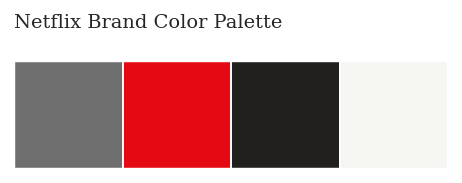

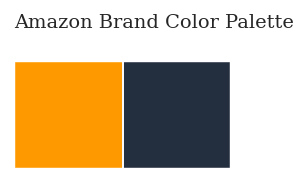

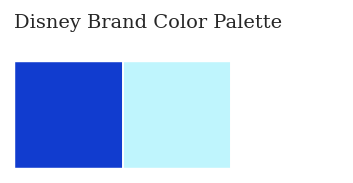

In [115]:
#sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
#plt.title("Netflix Brand Color Pattle",loc='left',fontfamily='serif',fontsize=10,y=1.2)
#plt.show()

#sns.palplot(['#000000', '#FF9900'])
#plt.title("Amazon Brand Color Pattle",loc='left',fontfamily='serif',fontsize=10,y=1.2)
#plt.show()

#sns.palplot(['#113CCF', '#FFFFFF', '#BFF5FD'])
#plt.title("Disney Brand Color Pattle",loc='left',fontfamily='serif',fontsize=10,y=1.2)
#plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Netflix Brand Color Palette
sns.palplot(['#6E6E6E', '#E50914', '#221F1F', '#F5F5F1'])
plt.title("Netflix Brand Color Palette", loc='left', fontfamily='serif', fontsize=10, y=1.2)
plt.show()

# Amazon Brand Color Palette
sns.palplot(['#FF9900', '#232F3E'])
plt.title("Amazon Brand Color Palette", loc='left', fontfamily='serif', fontsize=10, y=1.2)
plt.show()

# Disney Brand Color Palette
sns.palplot(['#113CCF', '#BFF5FD', '#FFFFFF'])
plt.title("Disney Brand Color Palette", loc='left', fontfamily='serif', fontsize=10, y=1.2)
plt.show()

### 2. Total Movies & TV-Shows

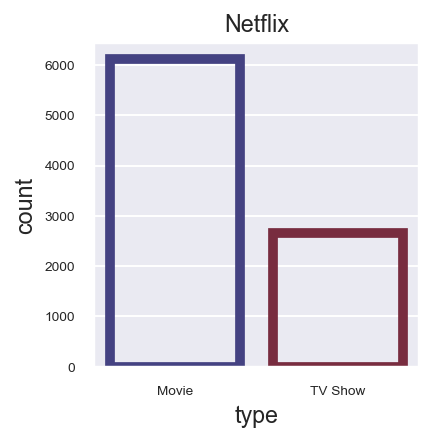

In [116]:
ax = sns.countplot(x=netflix['type'],data=netflix,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("icefire", 2)).set(title='Netflix')
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.show()


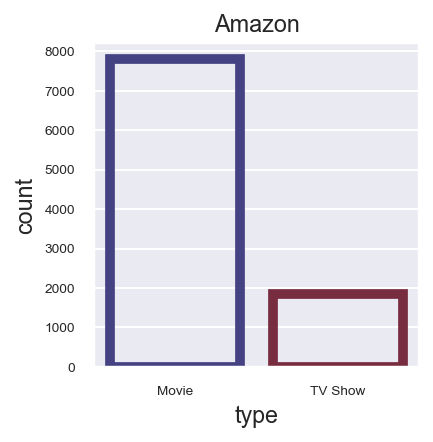

In [117]:

#Amazon
ax = sns.countplot(x="type",data=amazon,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("icefire", 2)).set(title='Amazon')
plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.show()


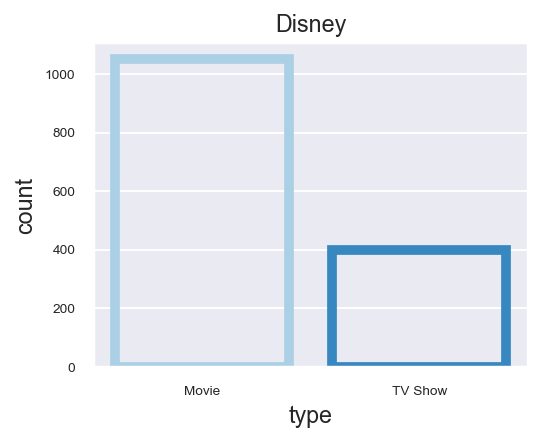

In [118]:

#Disney
ax = sns.countplot(x="type",data=disney,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("Blues", 2)).set(title='Disney')
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.show()

### Content Update Over the Time

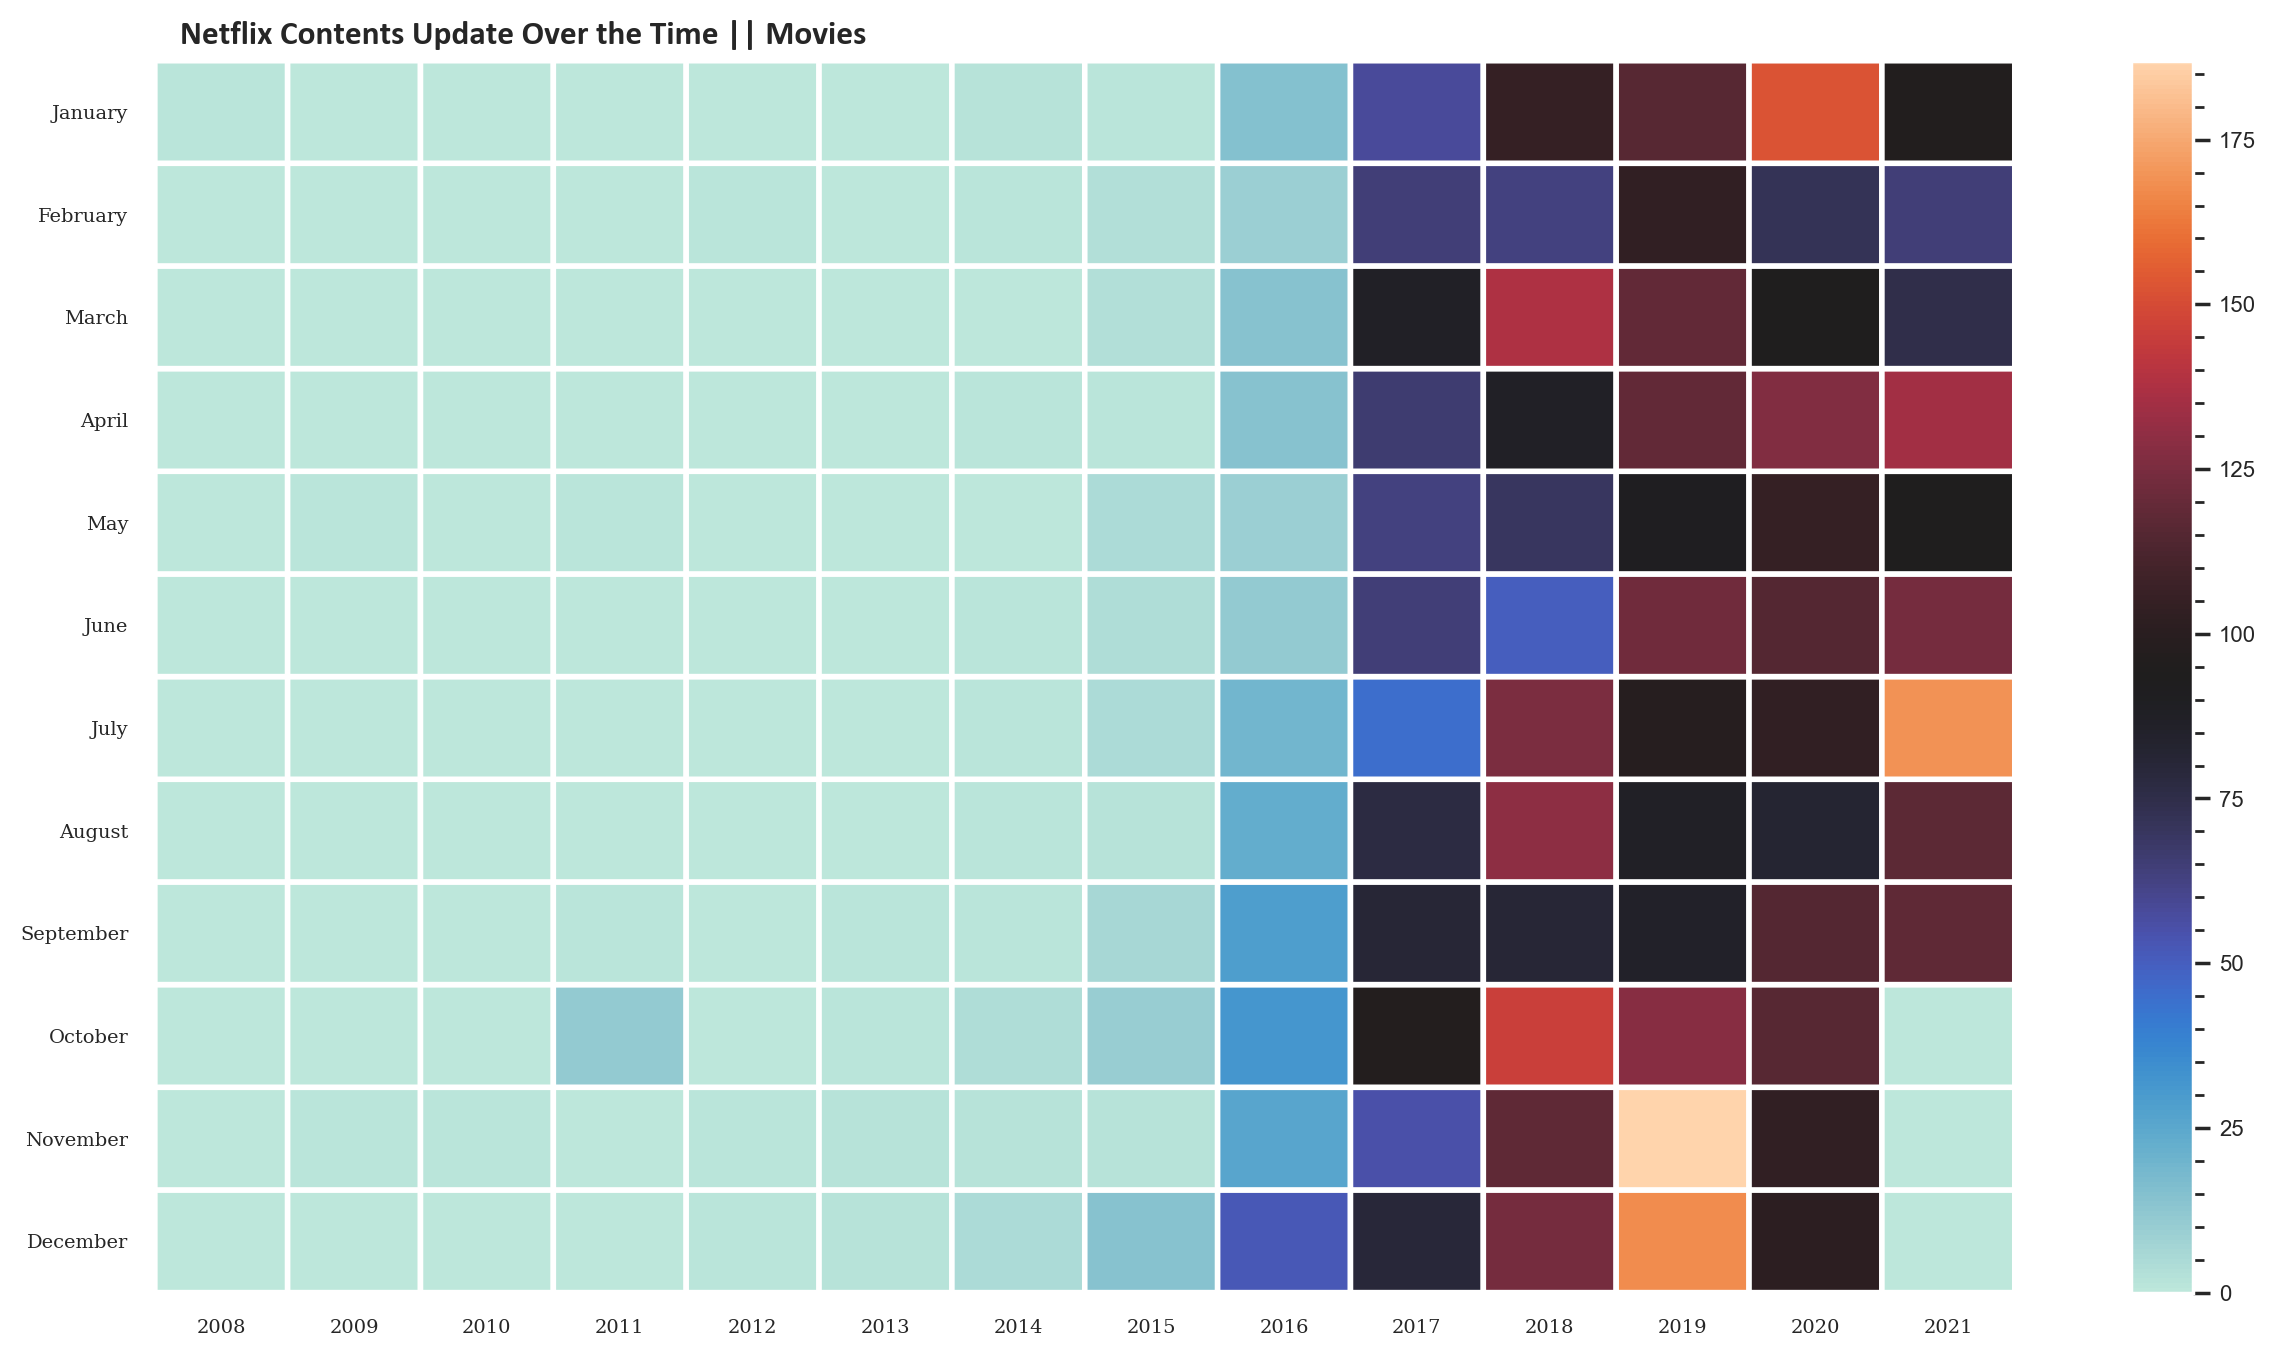

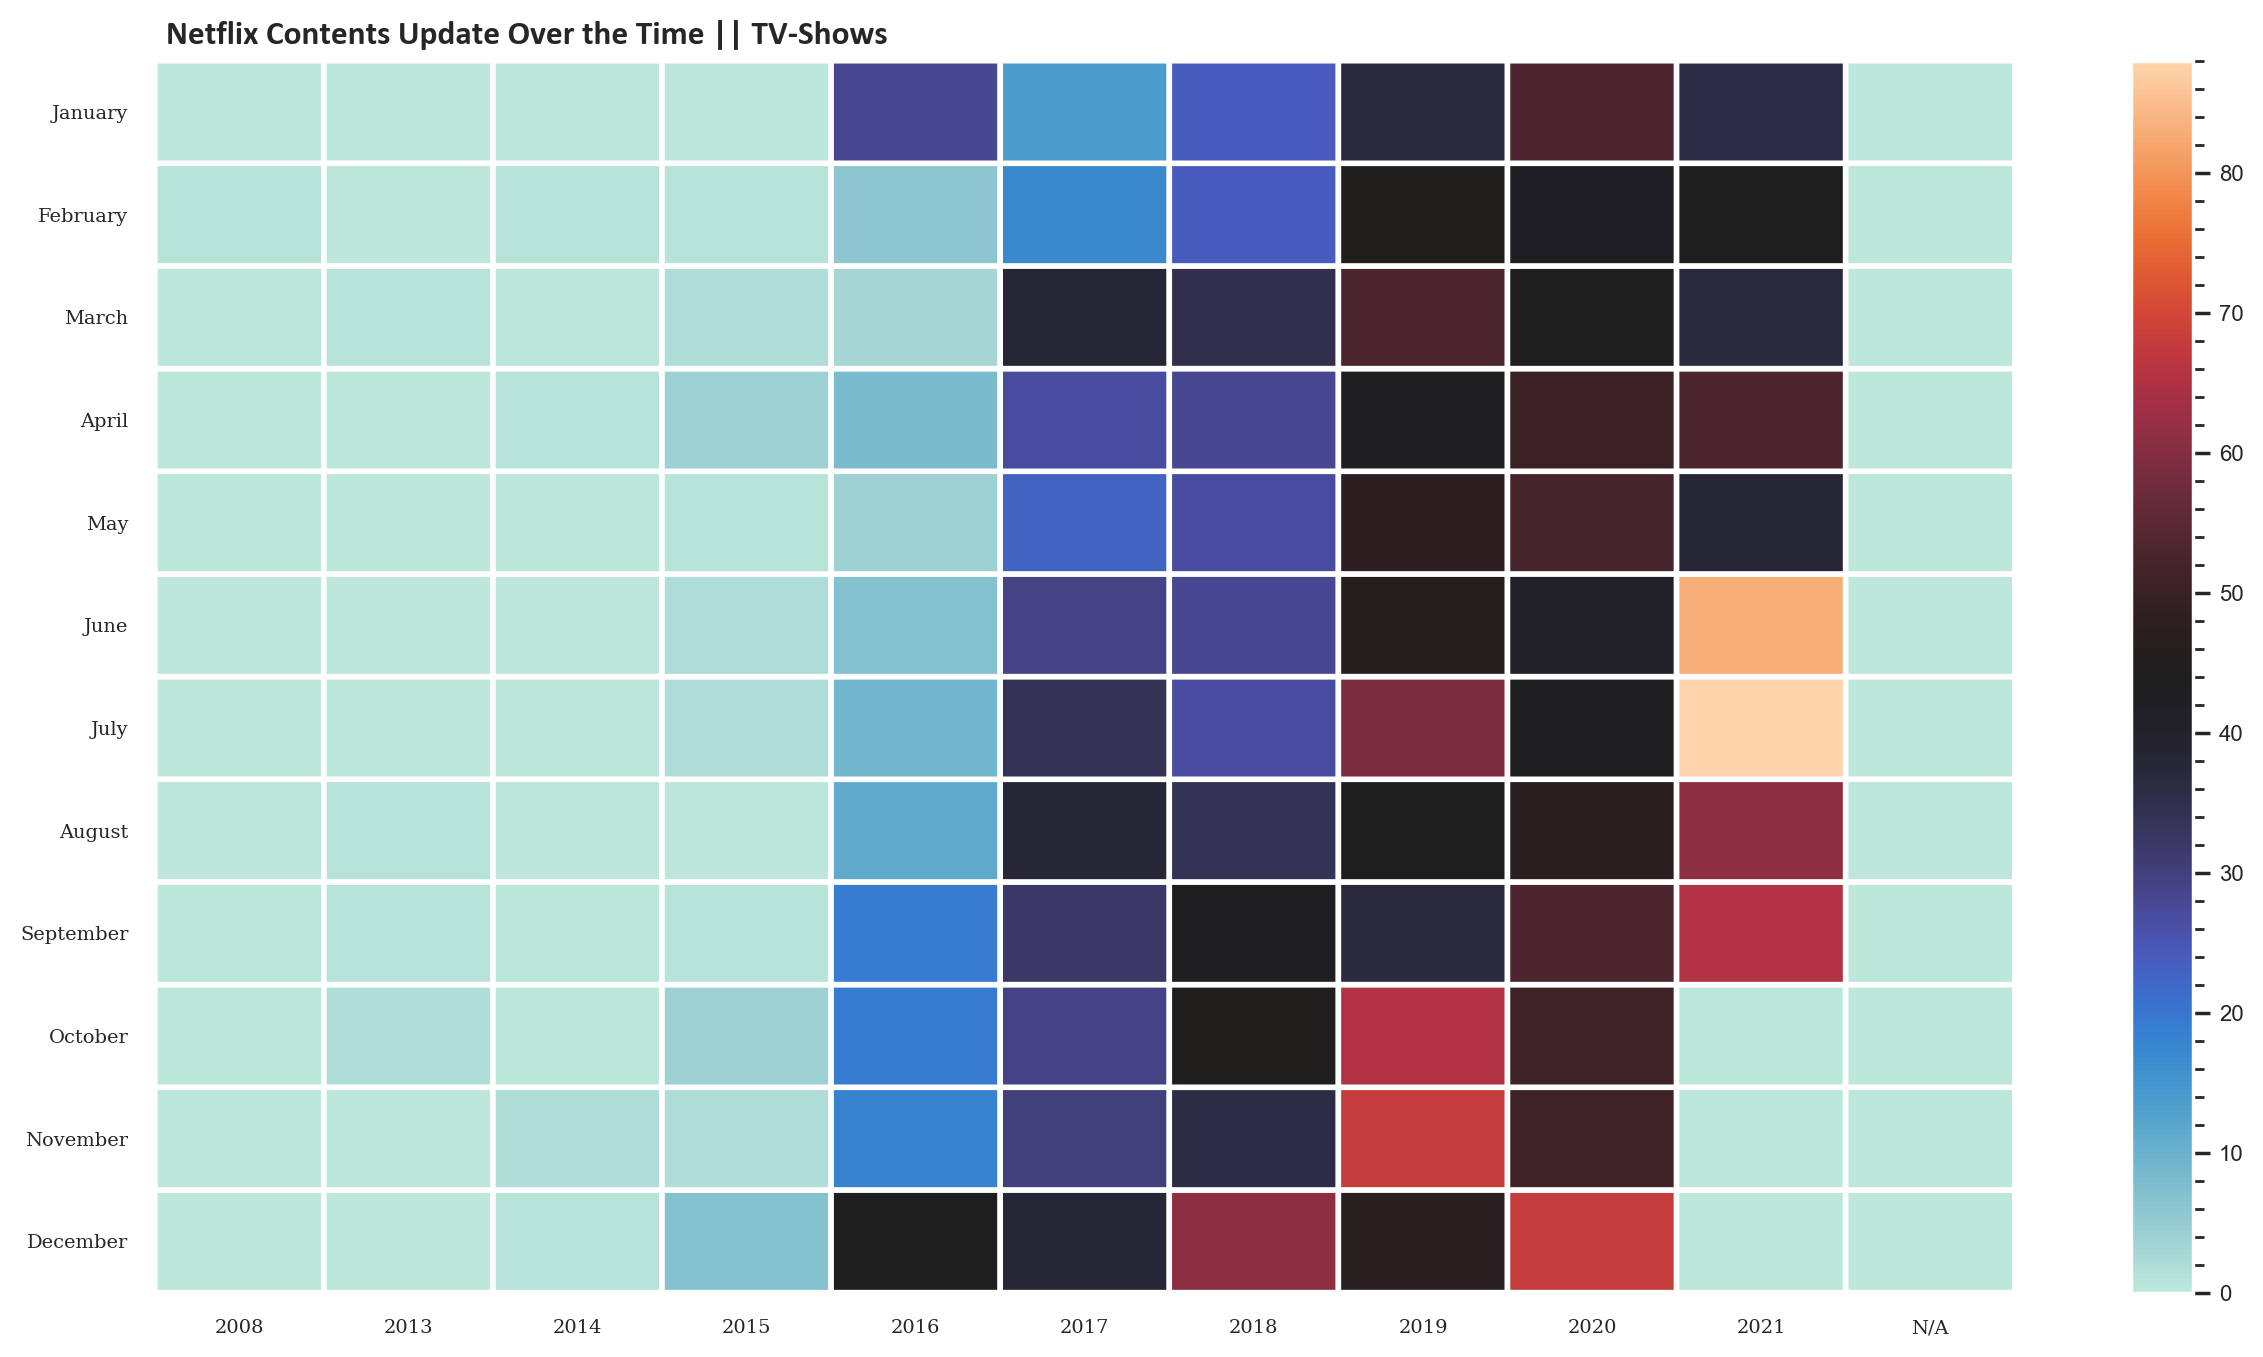

In [119]:
#For Example
#Netflix
n_date = netflix_movies[['date_added']].dropna()
n_date['year'] = n_date['date_added'].apply(lambda x : x.split(', ')[-1])
n_date['month'] = n_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
netflix = n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(15, 8), dpi=200)
plt.pcolor(netflix, cmap='icefire', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(netflix.columns), 1), netflix.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(netflix.index), 1), netflix.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update Over the Time || Movies ', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

n_date = netflix_shows[['date_added']].dropna()
n_date['year'] = n_date['date_added'].apply(lambda x : x.split(', ')[-1])
n_date['month'] = n_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
netflix = n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(15, 8), dpi=200)
plt.pcolor(netflix, cmap='icefire', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(netflix.columns), 1), netflix.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(netflix.index), 1), netflix.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update Over the Time || TV-Shows', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### Movie rating Analysis

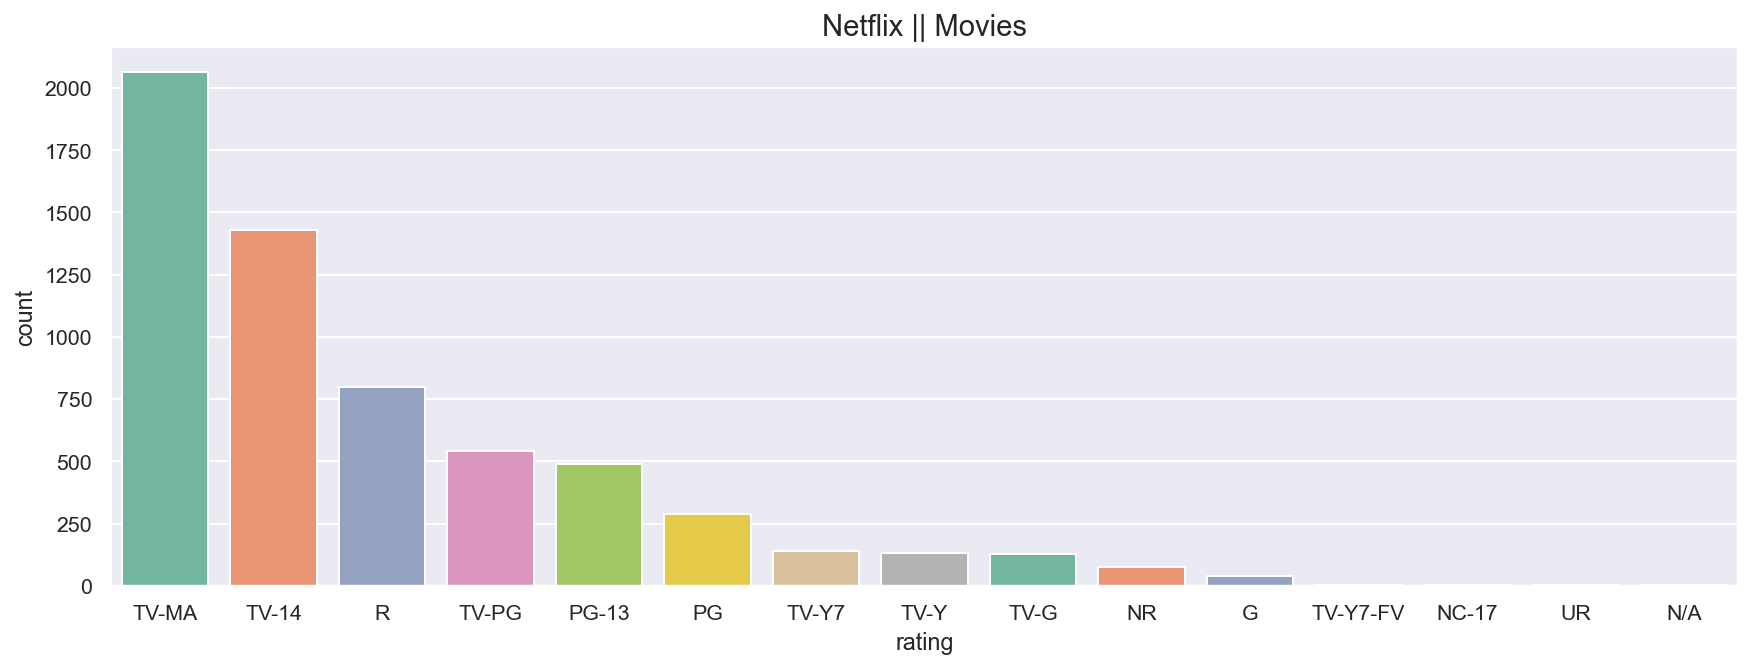

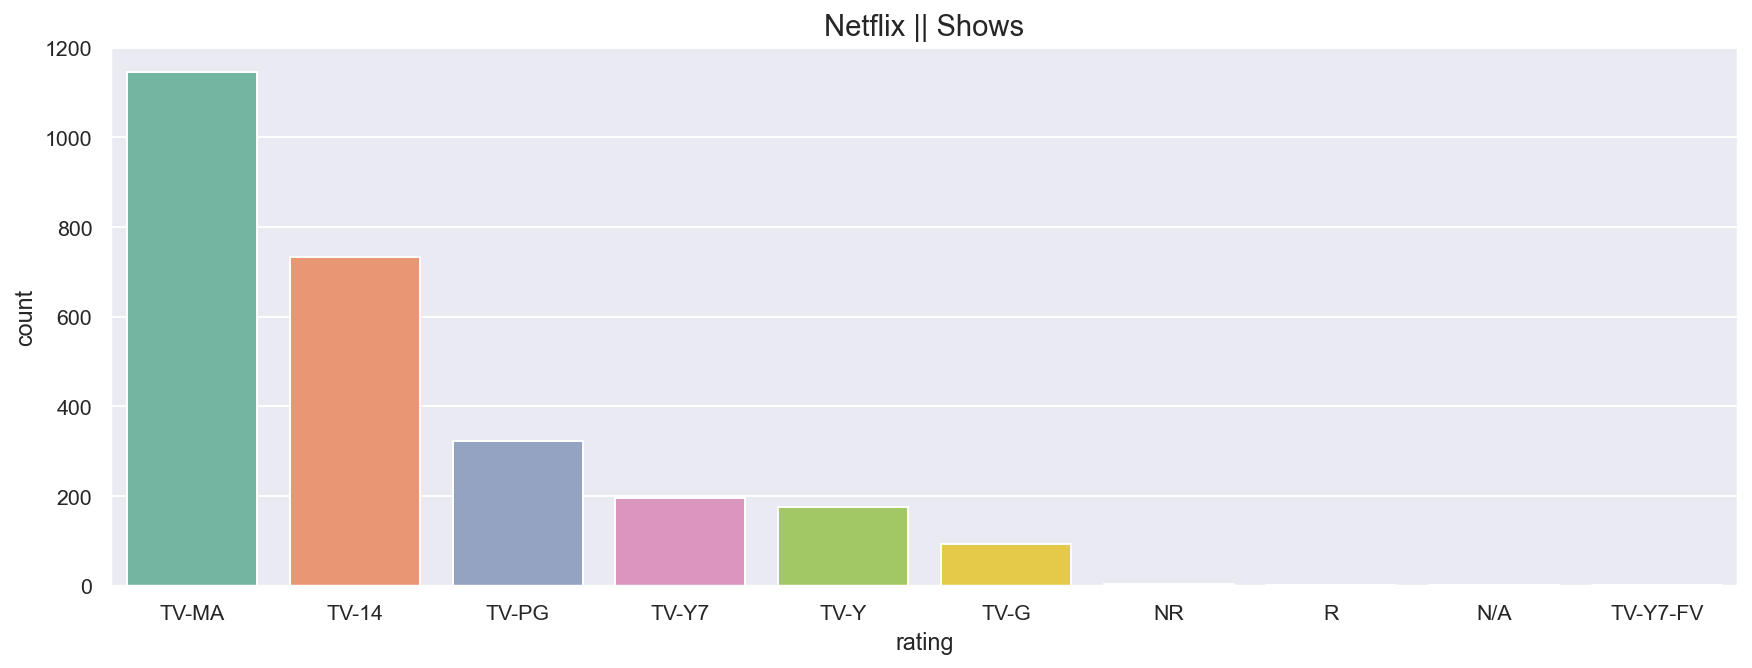

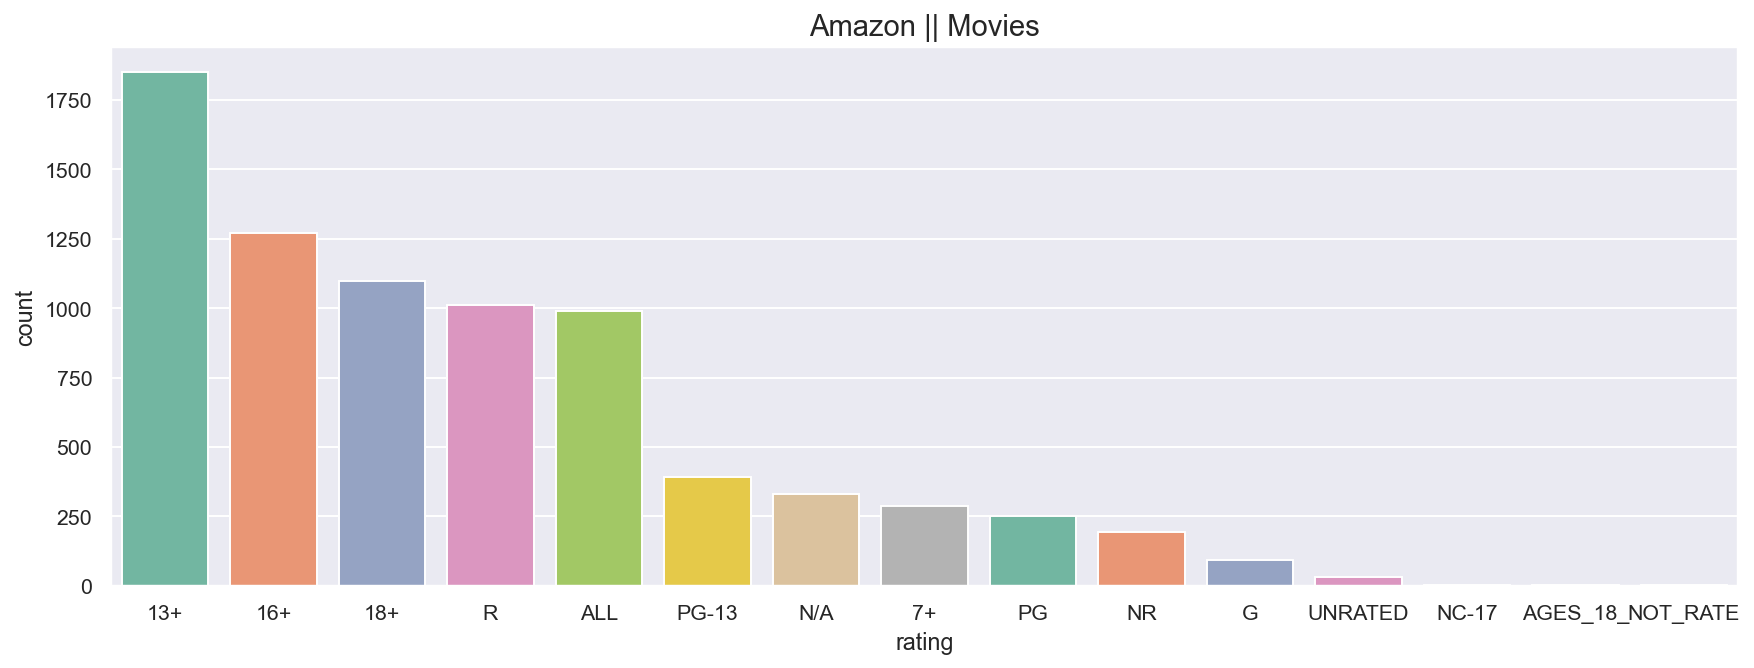

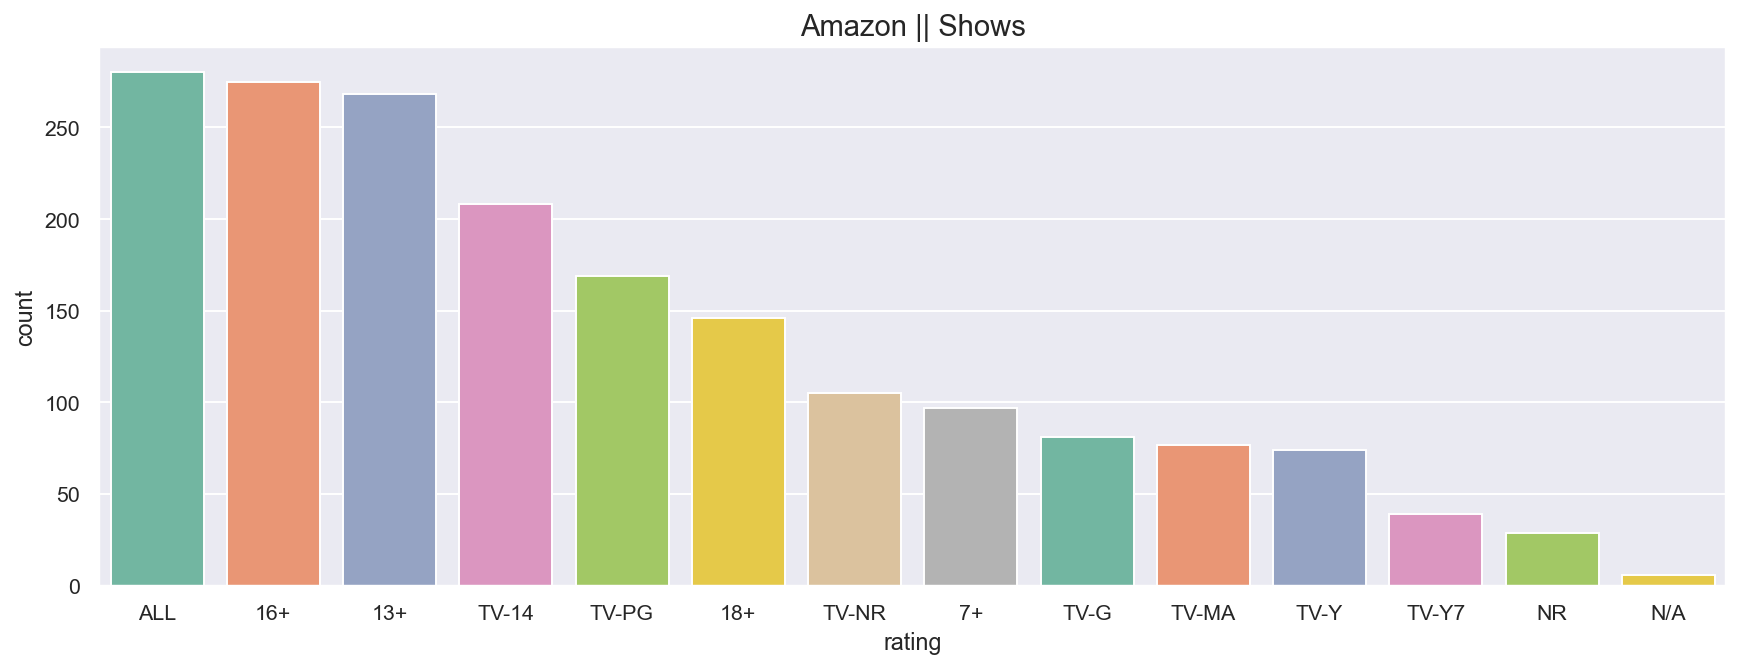

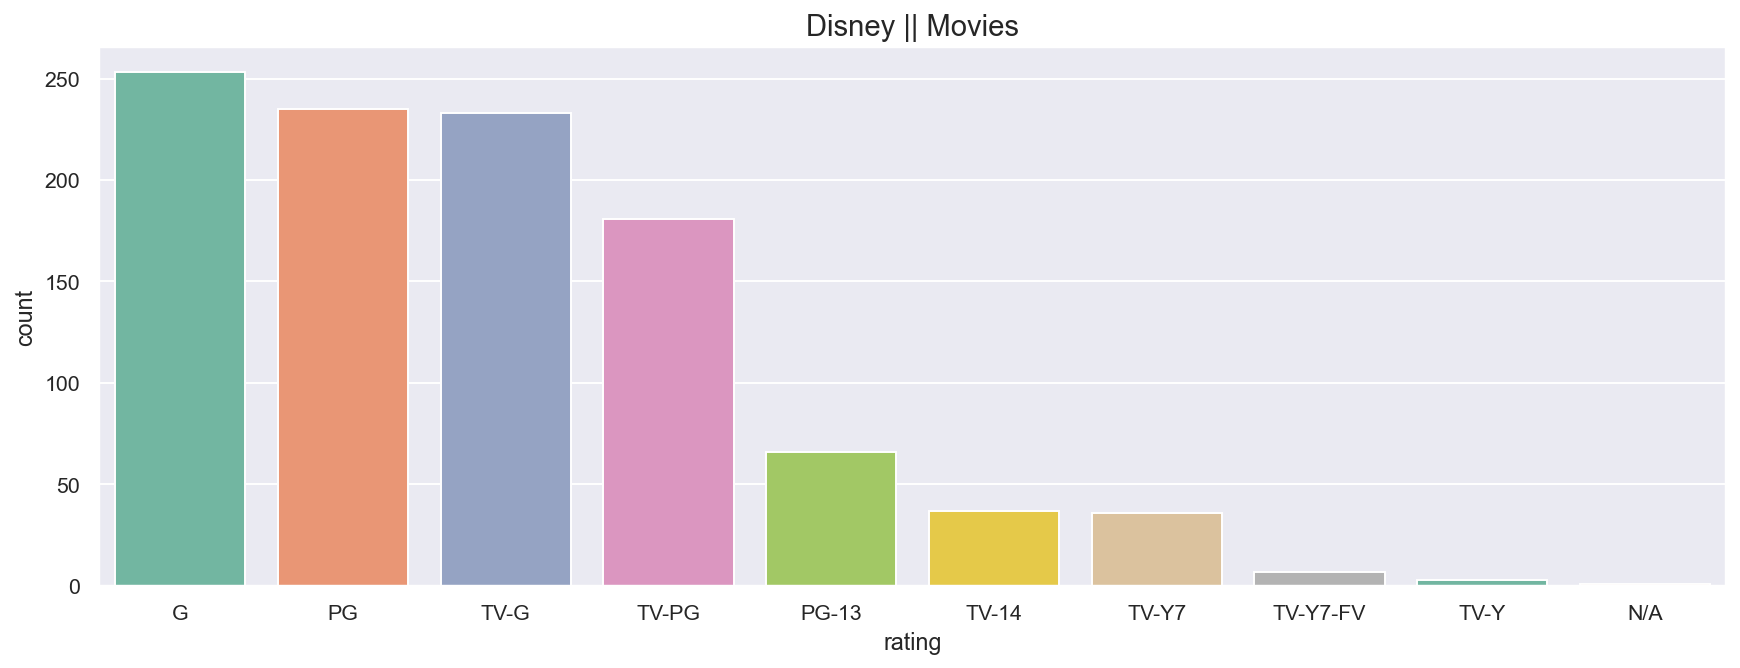

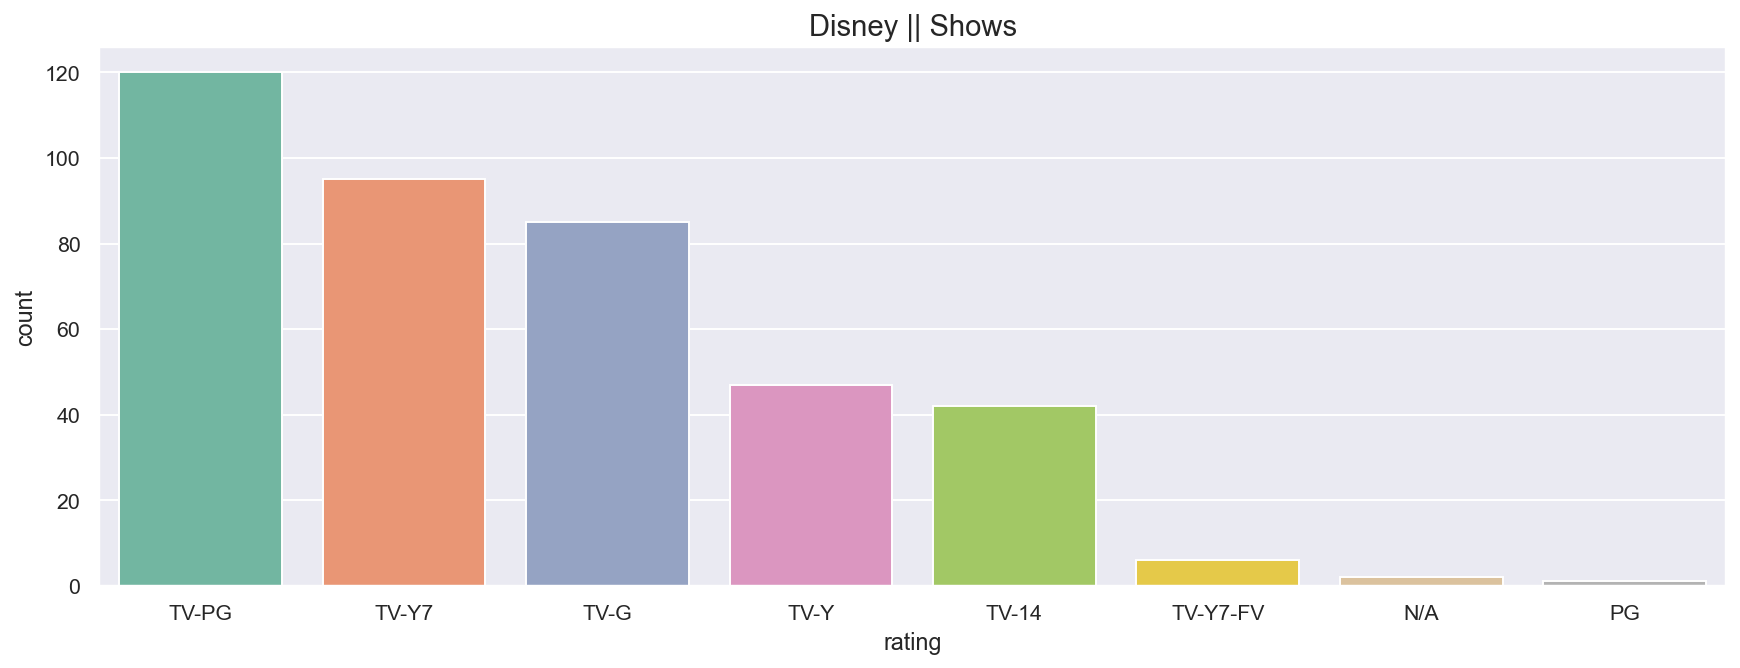

In [120]:
#NETFLIX
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Movies',size="15")
sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])
plt.show()

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Shows',size="15")
sns.countplot(x="rating", data=netflix_shows, palette="Set2", order=netflix_shows['rating'].value_counts().index[0:15])
plt.show()

#AMAZON
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Movies',size="15")
sns.countplot(x="rating", data=amazon_movies, palette="Set2", order=amazon_movies['rating'].value_counts().index[0:15])
plt.show()

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Shows',size="15")
sns.countplot(x="rating", data=amazon_shows, palette="Set2", order=amazon_shows['rating'].value_counts().index[0:15])
plt.show()

#DISNEY
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Movies',size="15")
sns.countplot(x="rating", data=disney_movies, palette="Set2", order=disney_movies['rating'].value_counts().index[0:15])
plt.show()

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Shows',size="15")
sns.countplot(x="rating", data=disney_shows, palette="Set2", order=disney_shows['rating'].value_counts().index[0:15])
plt.show()

### Year Wise Analysis

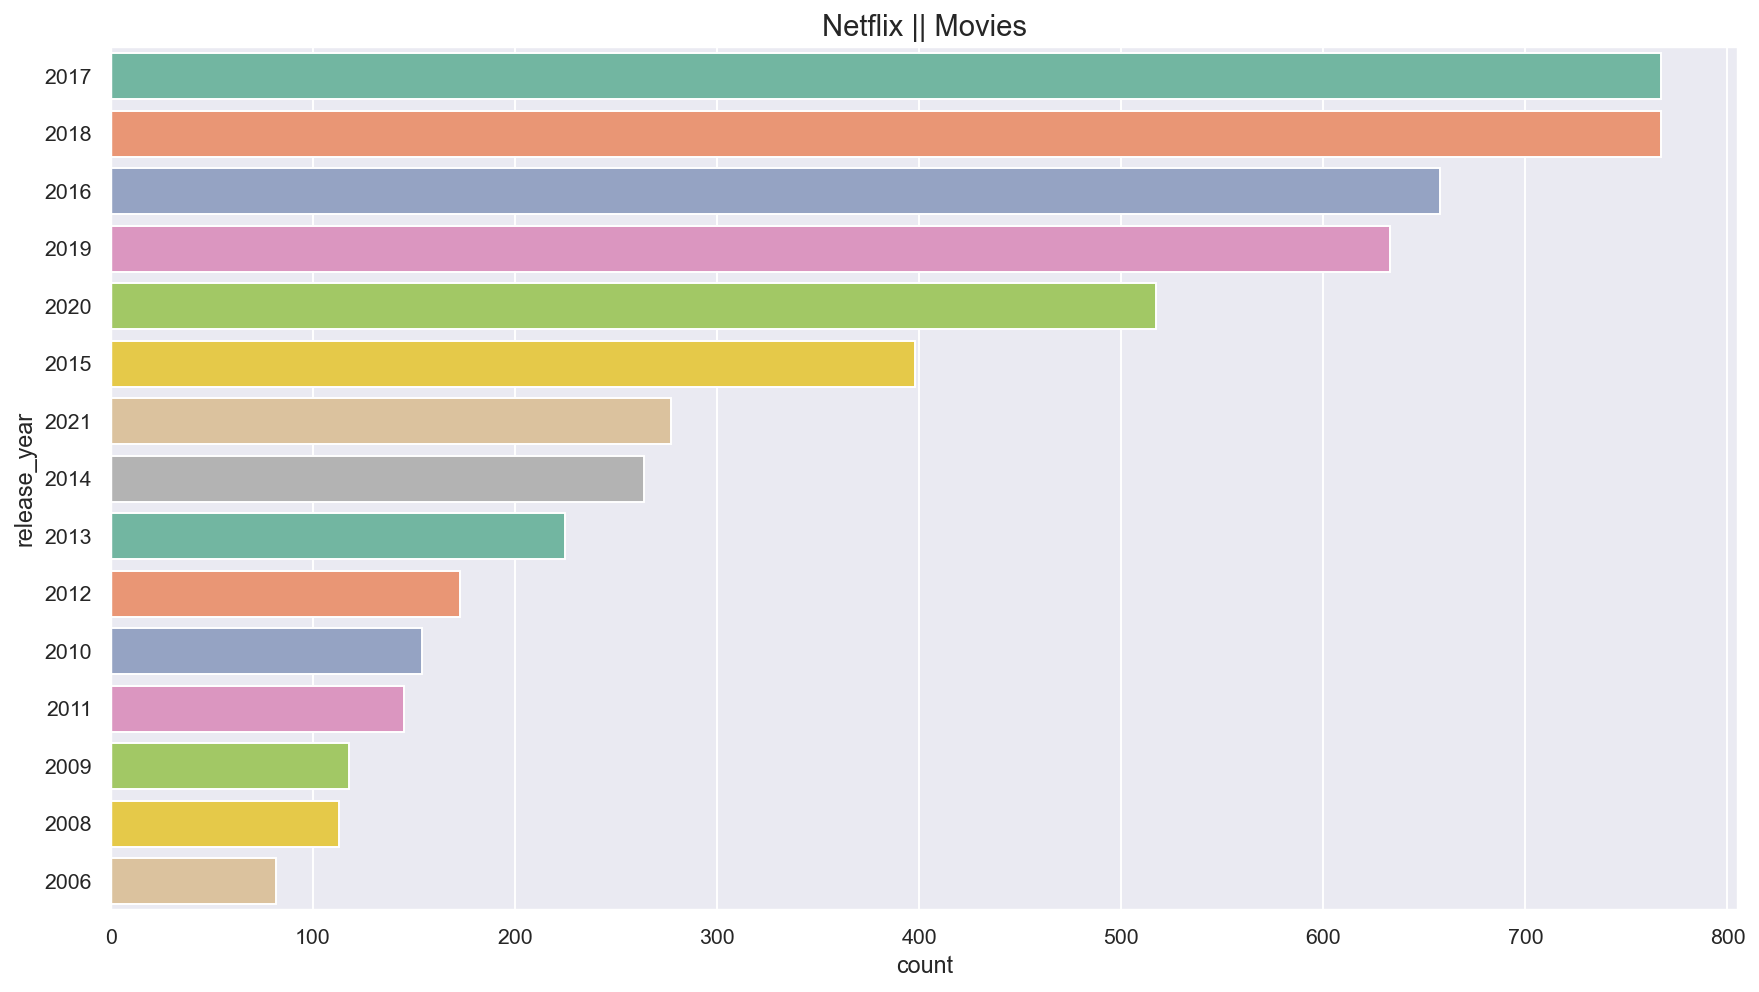

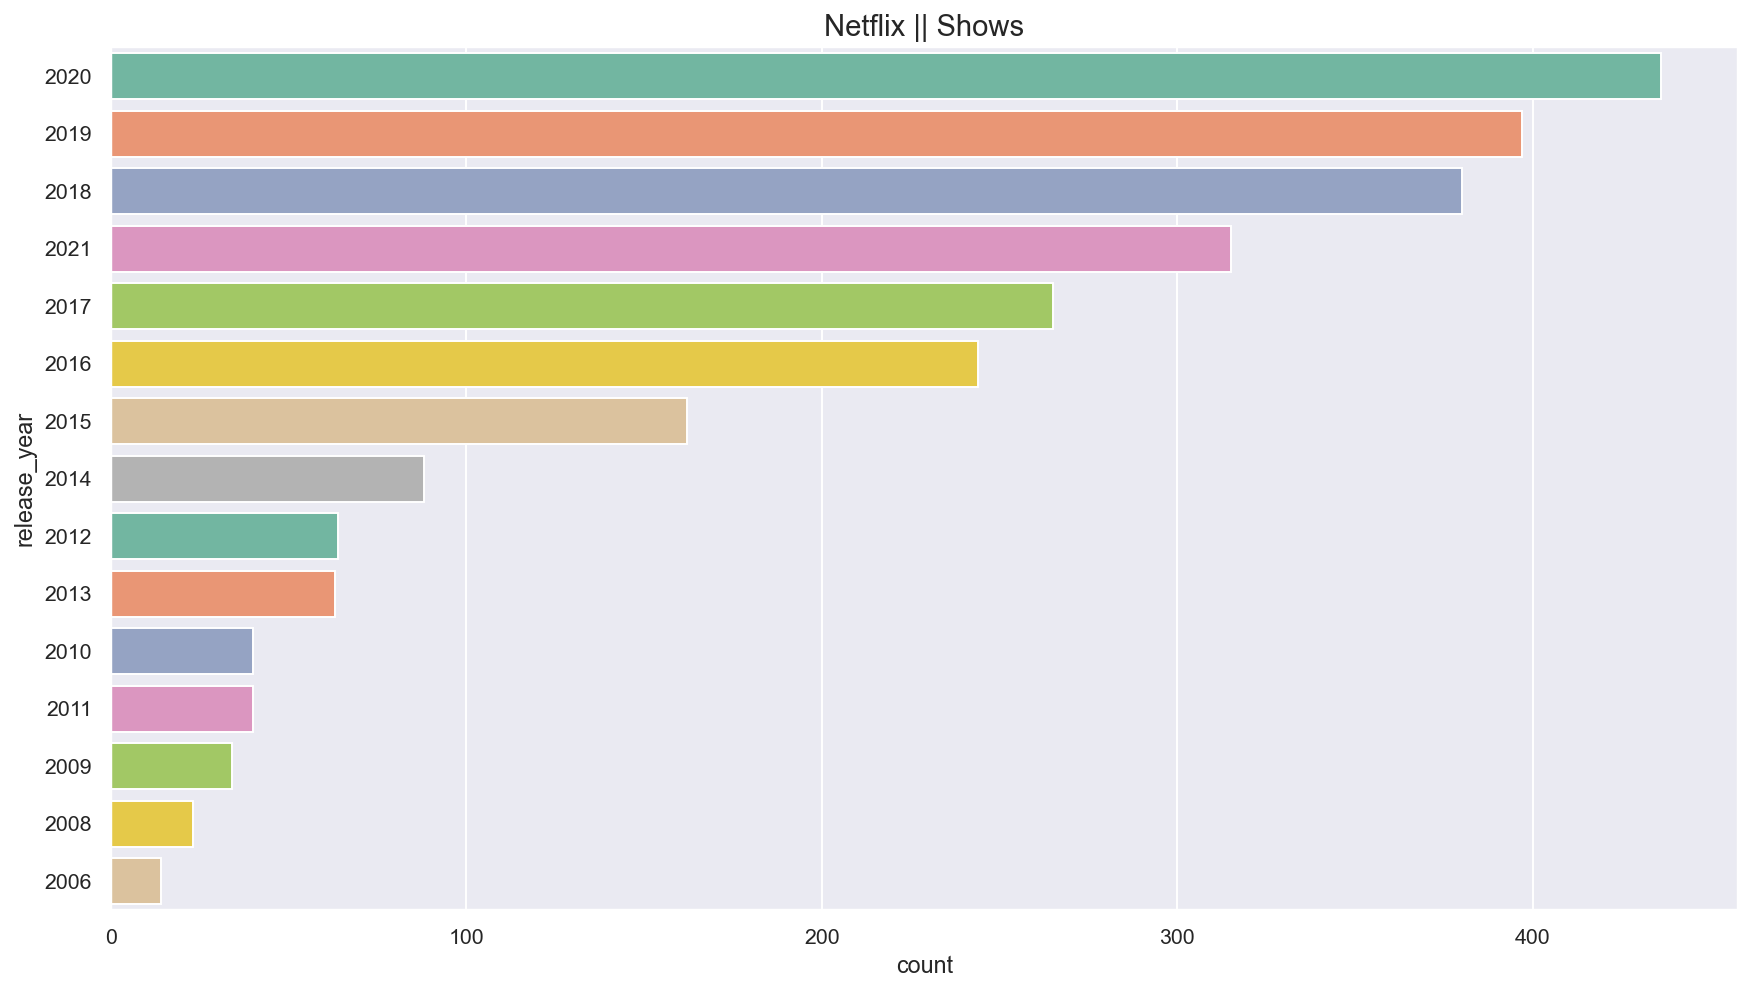

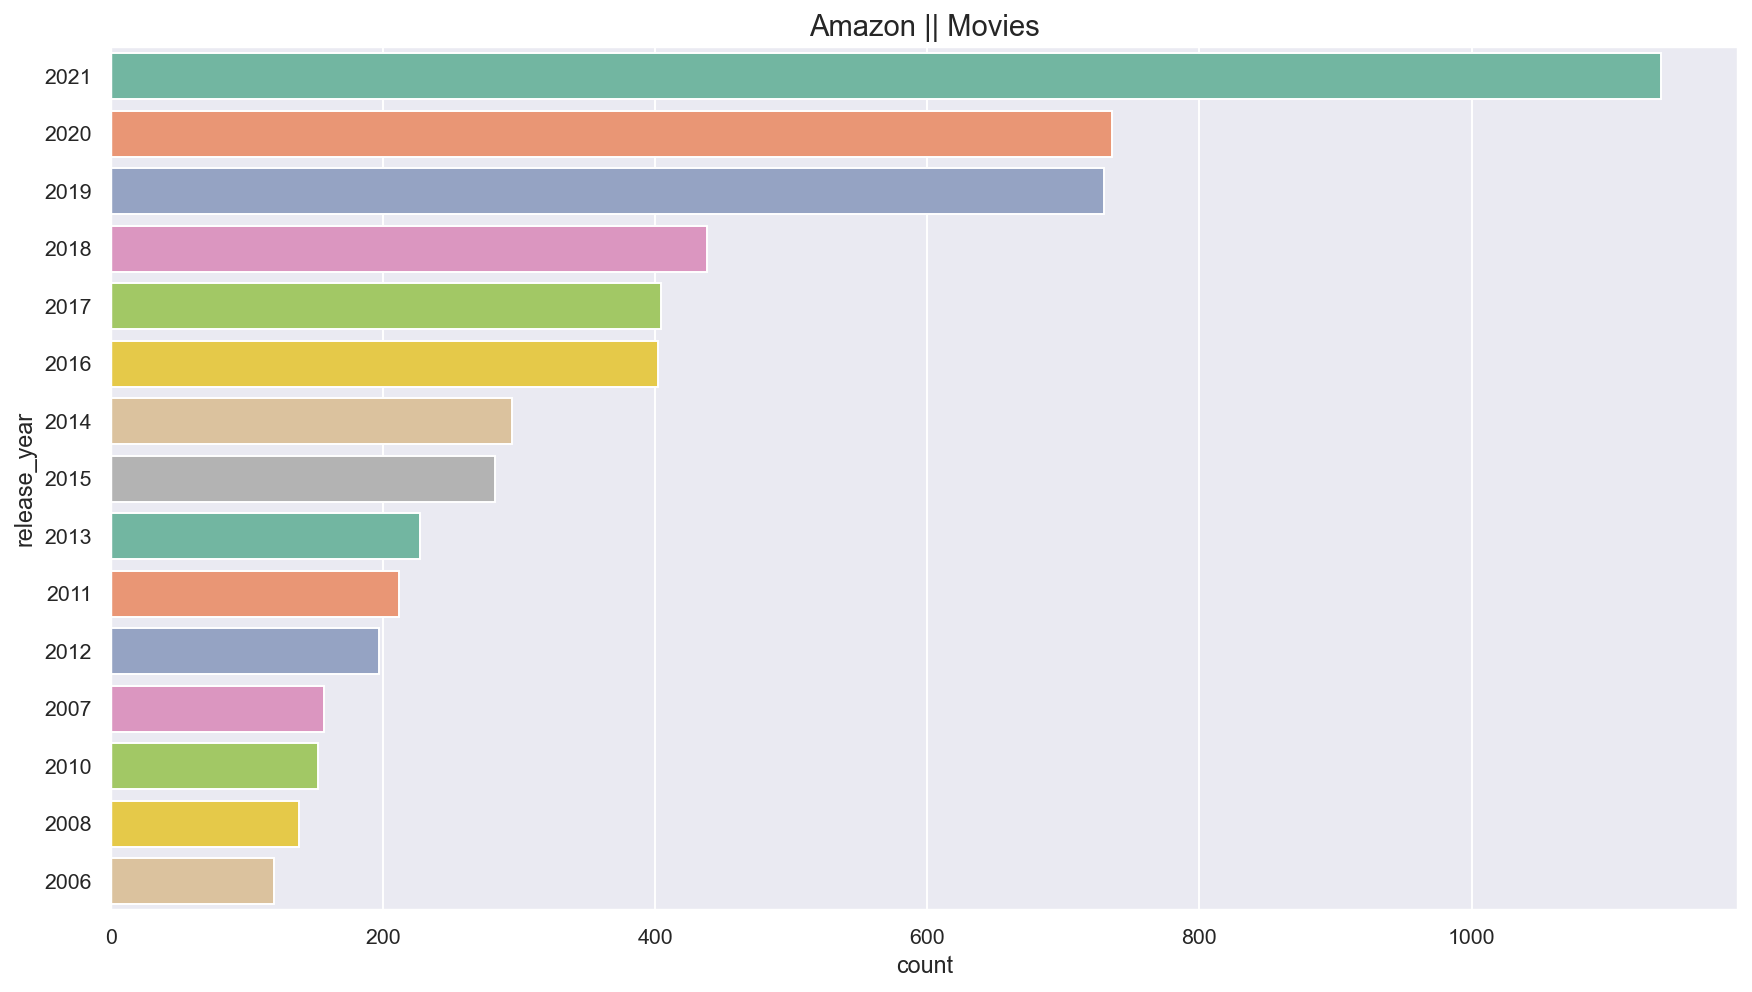

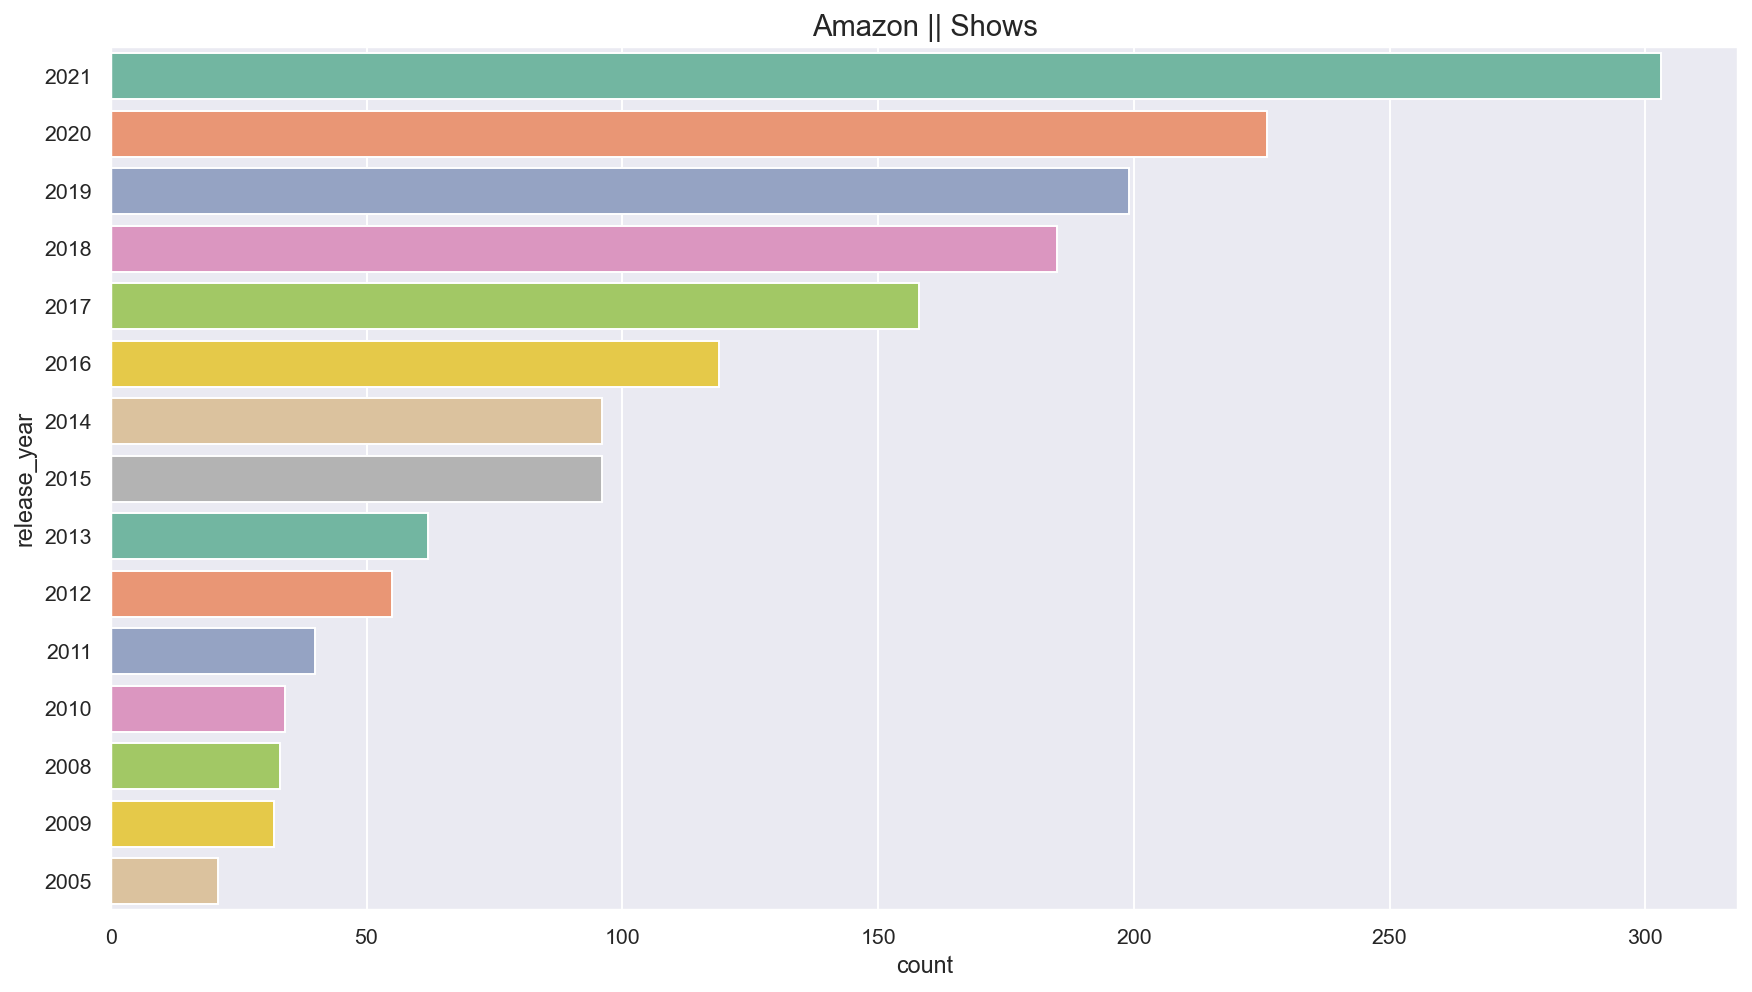

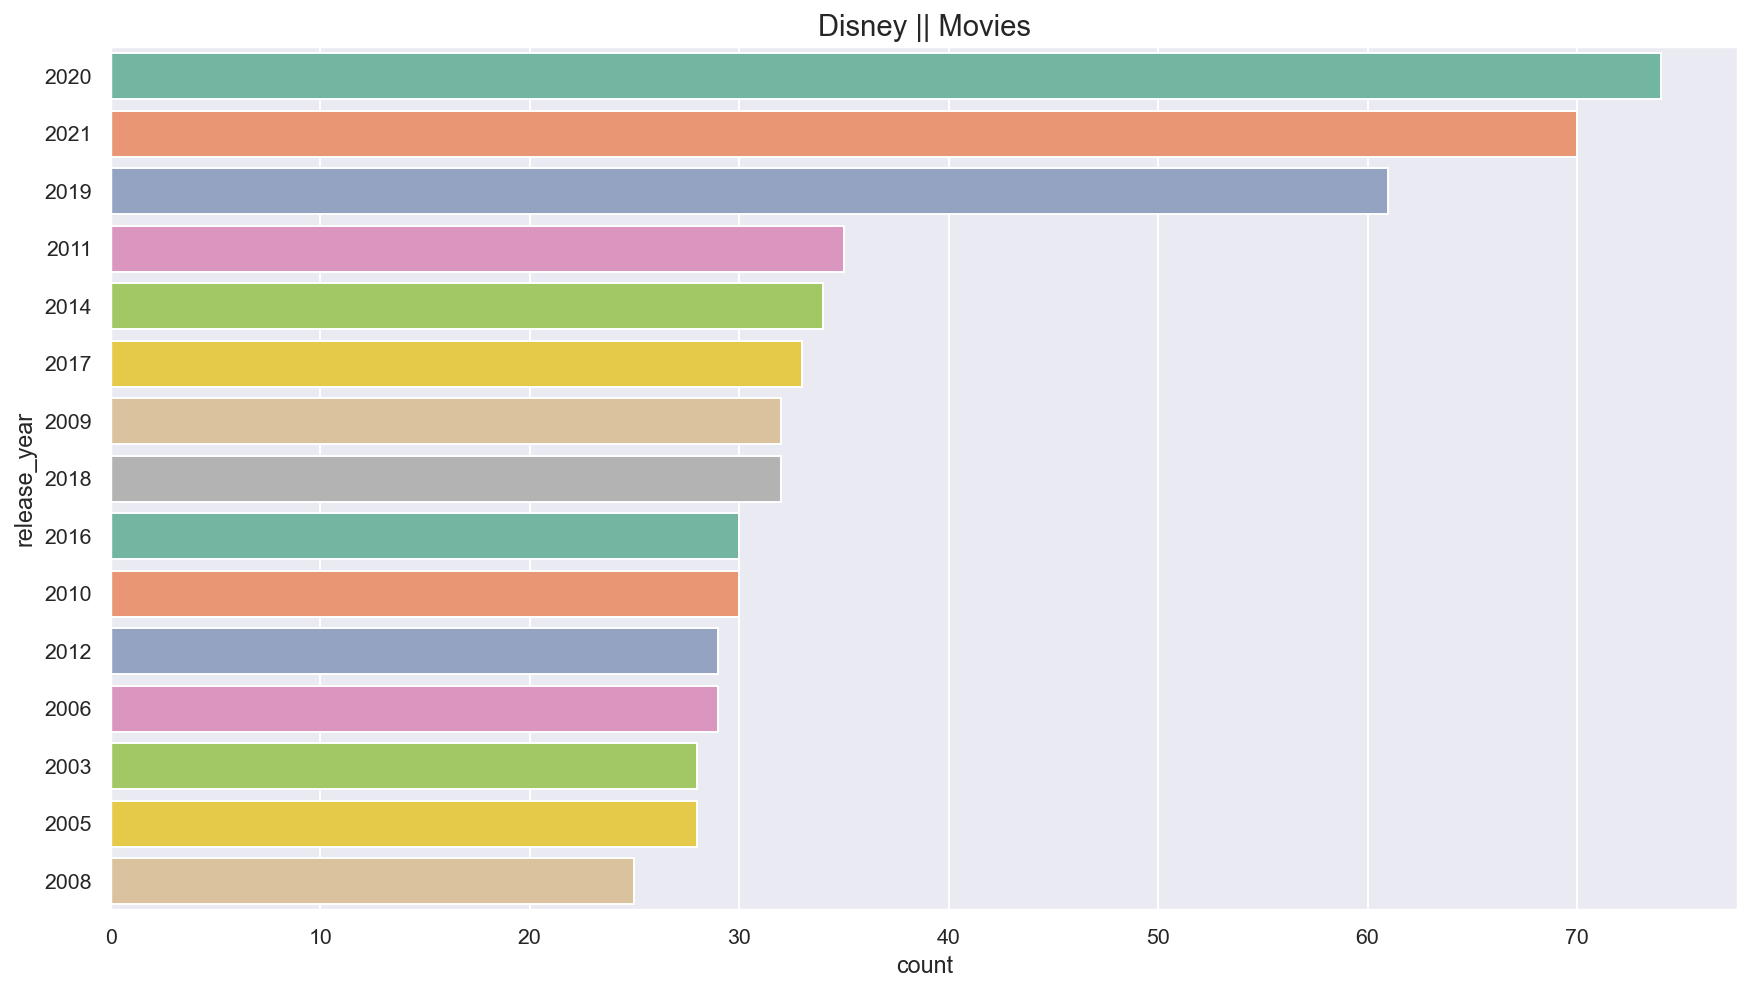

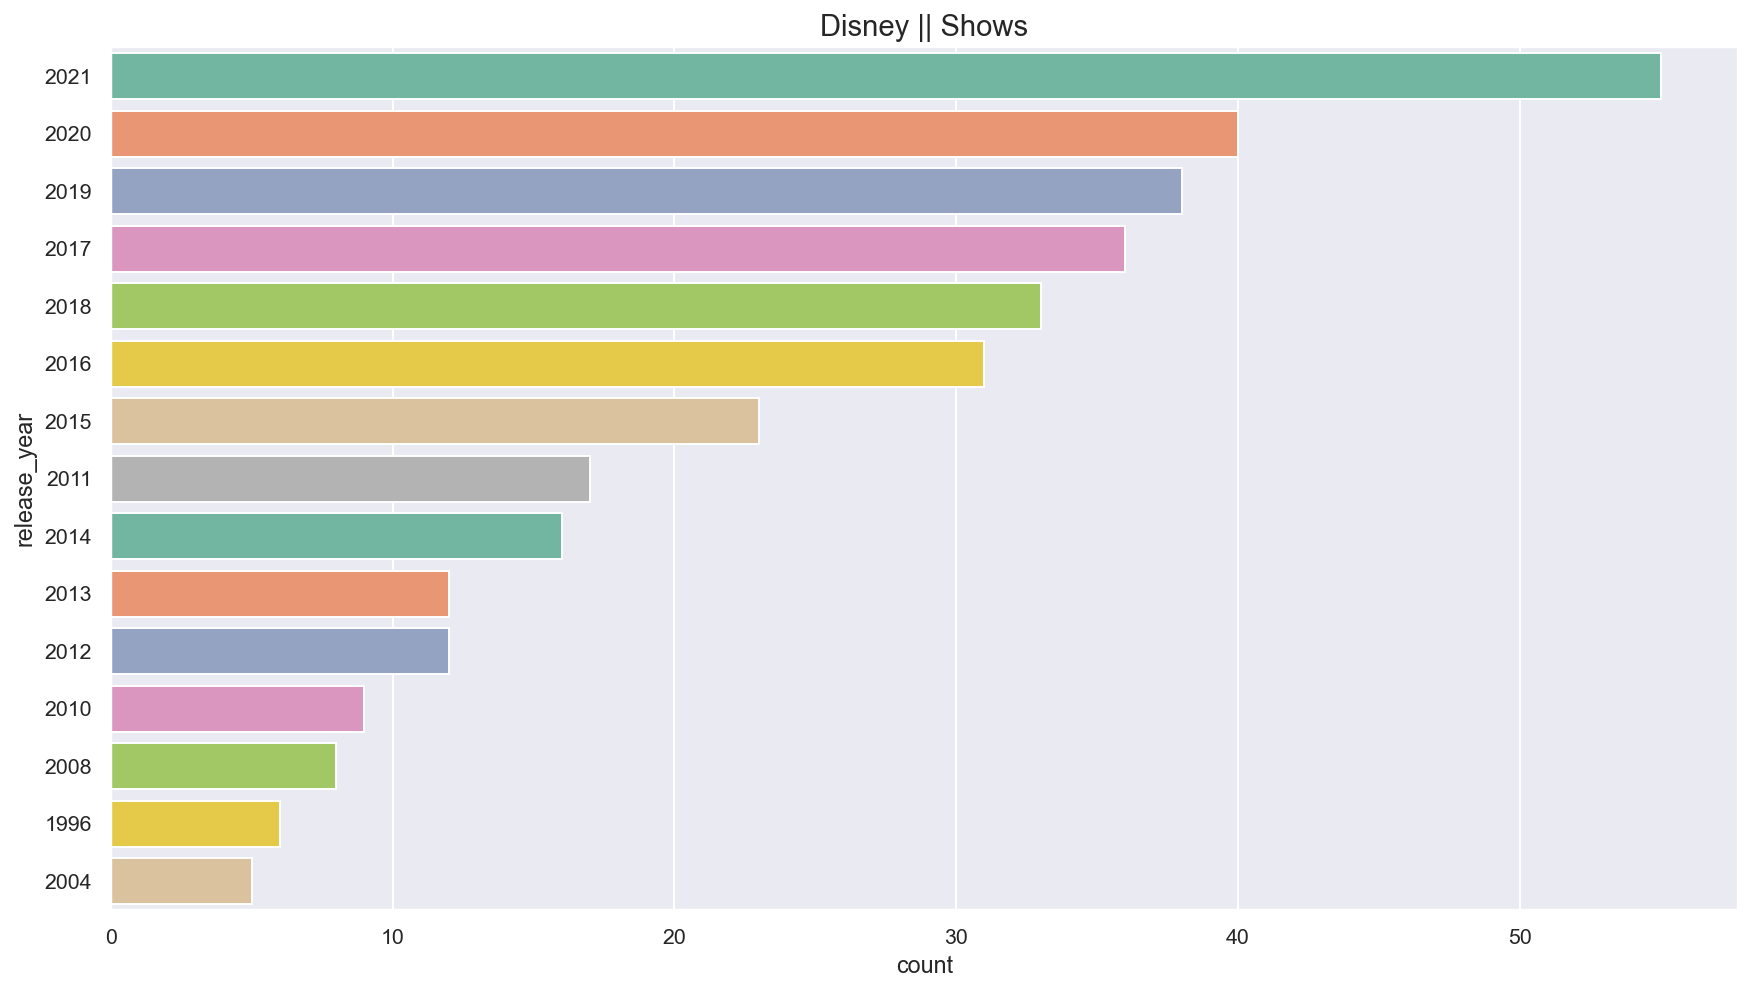

In [62]:
#NETFLIX
plt.figure(figsize=(15,8))
plt.title('Netflix || Movies',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

plt.figure(figsize=(15,8))
plt.title('Netflix || Shows',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set2", order=netflix_shows['release_year'].value_counts().index[0:15])

#AMAZON
plt.figure(figsize=(15,8))
plt.title('Amazon || Movies',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=amazon_movies, palette="Set2", order=amazon_movies['release_year'].value_counts().index[0:15])

plt.figure(figsize=(15,8))
plt.title('Amazon || Shows',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=amazon_shows, palette="Set2", order=amazon_shows['release_year'].value_counts().index[0:15])


#DISNEY
plt.figure(figsize=(15,8))
plt.title('Disney || Movies',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=disney_movies, palette="Set2", order=disney_movies['release_year'].value_counts().index[0:15])

plt.figure(figsize=(15,8))
plt.title('Disney || Shows',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=disney_shows, palette="Set2", order=disney_shows['release_year'].value_counts().index[0:15])

## Top 10 Content Creating Country's 

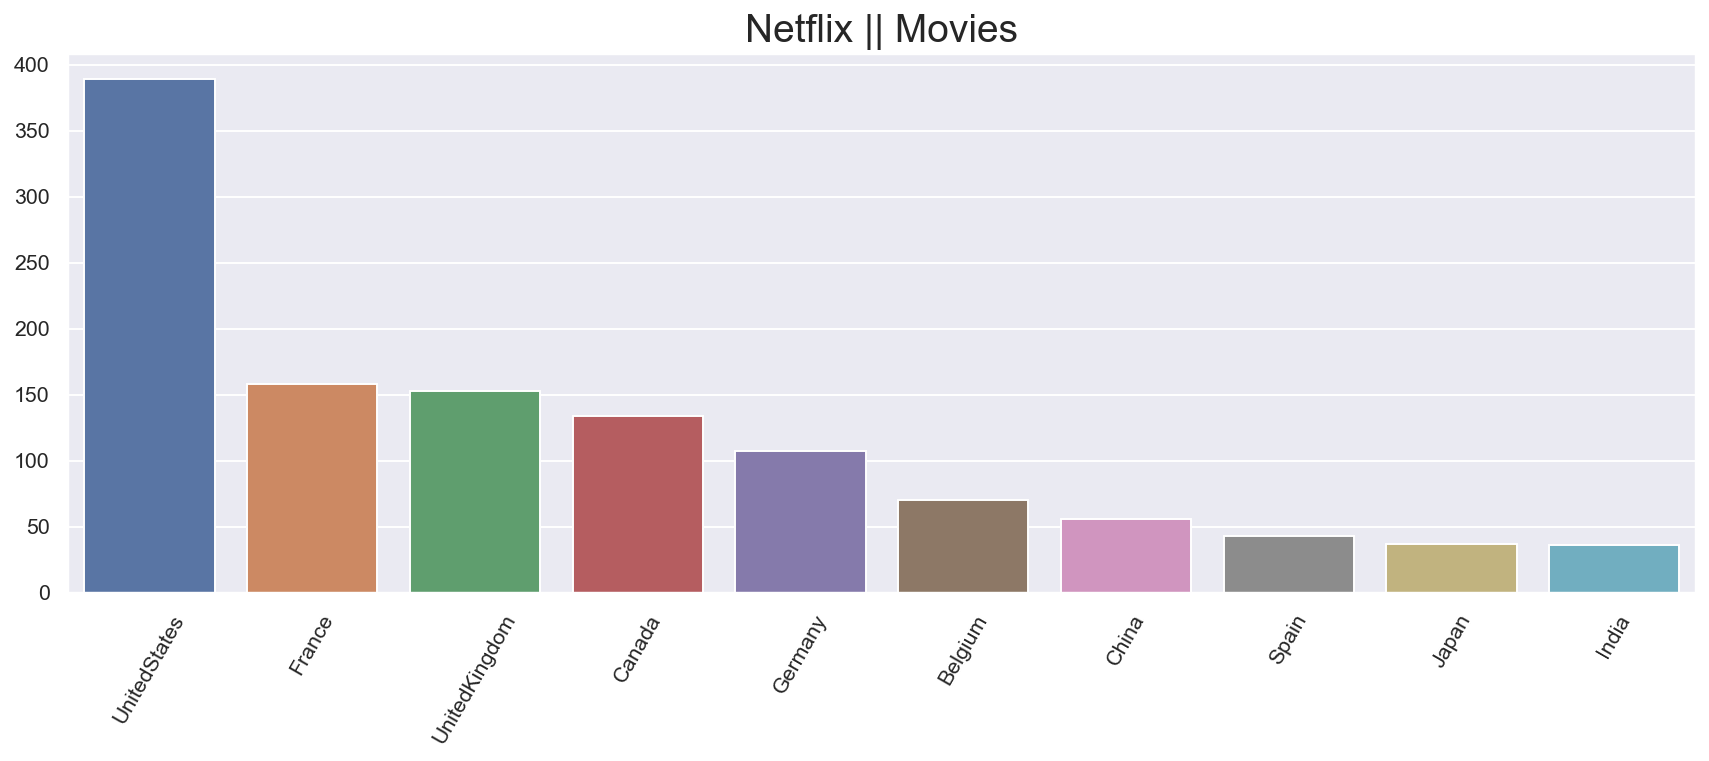

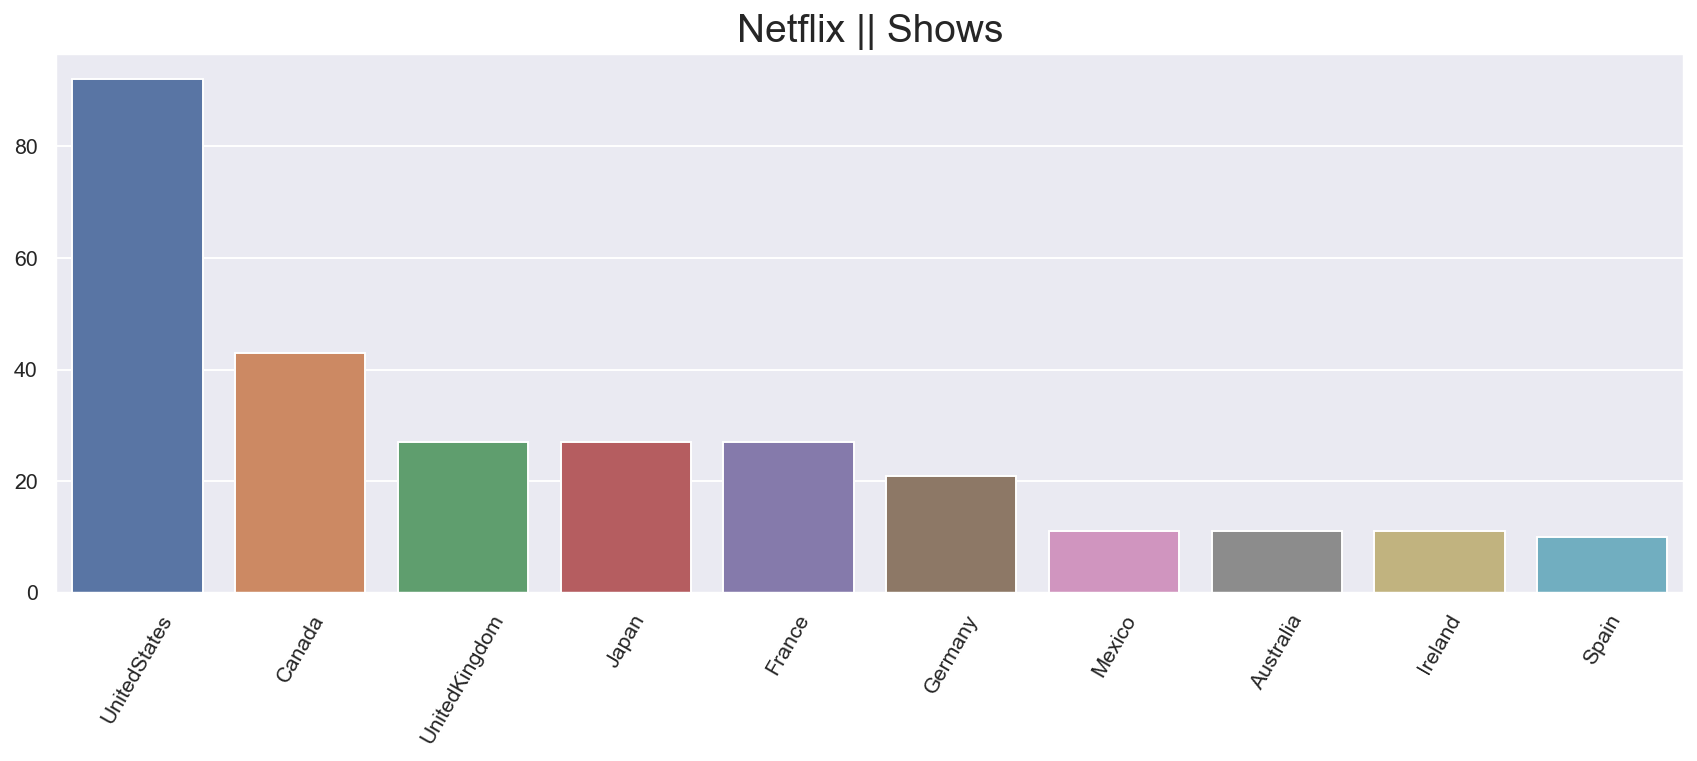

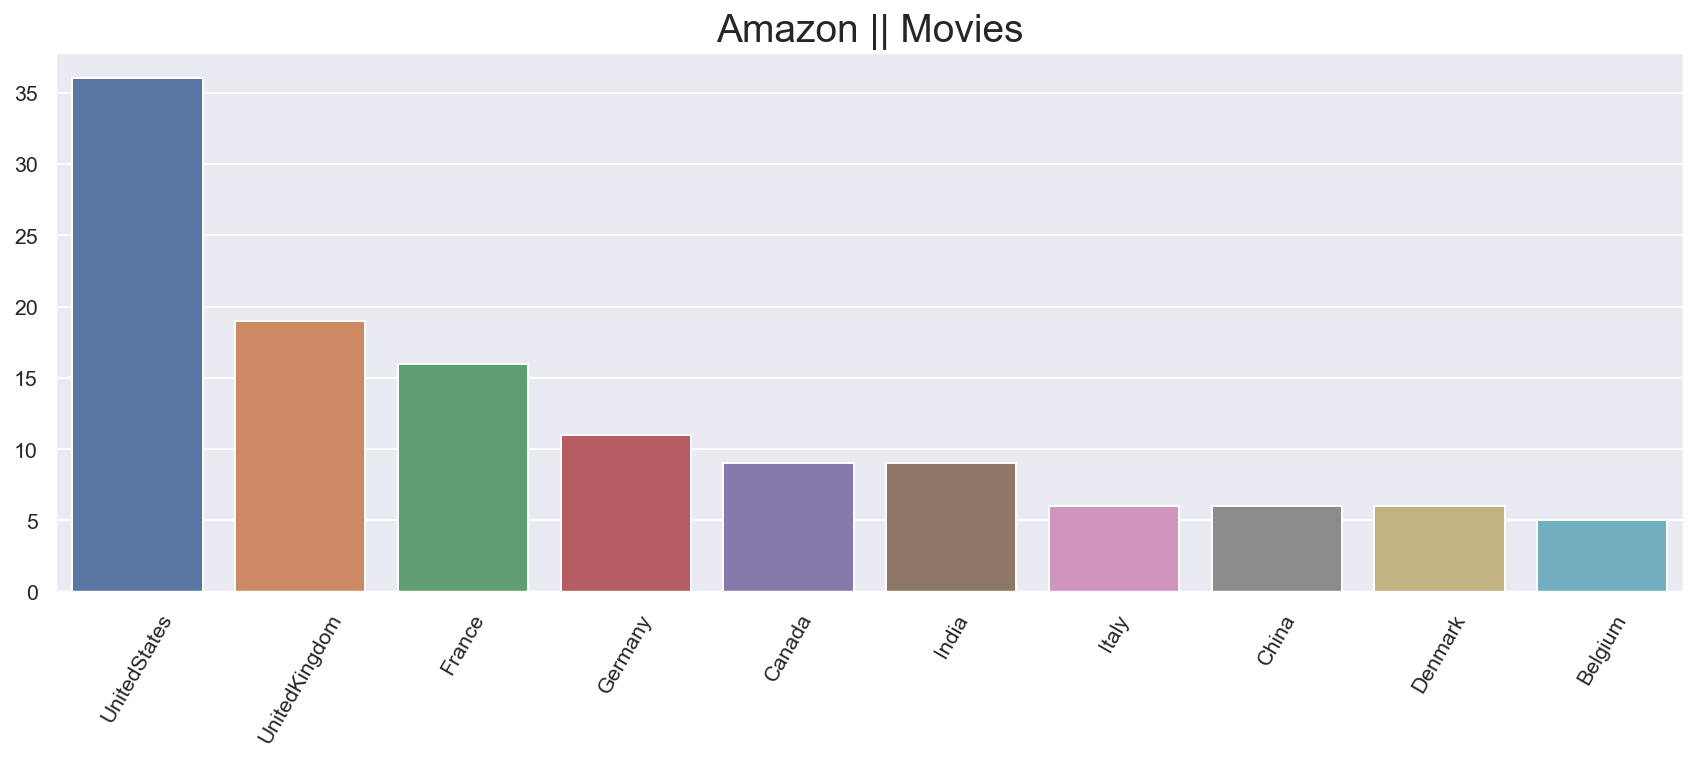

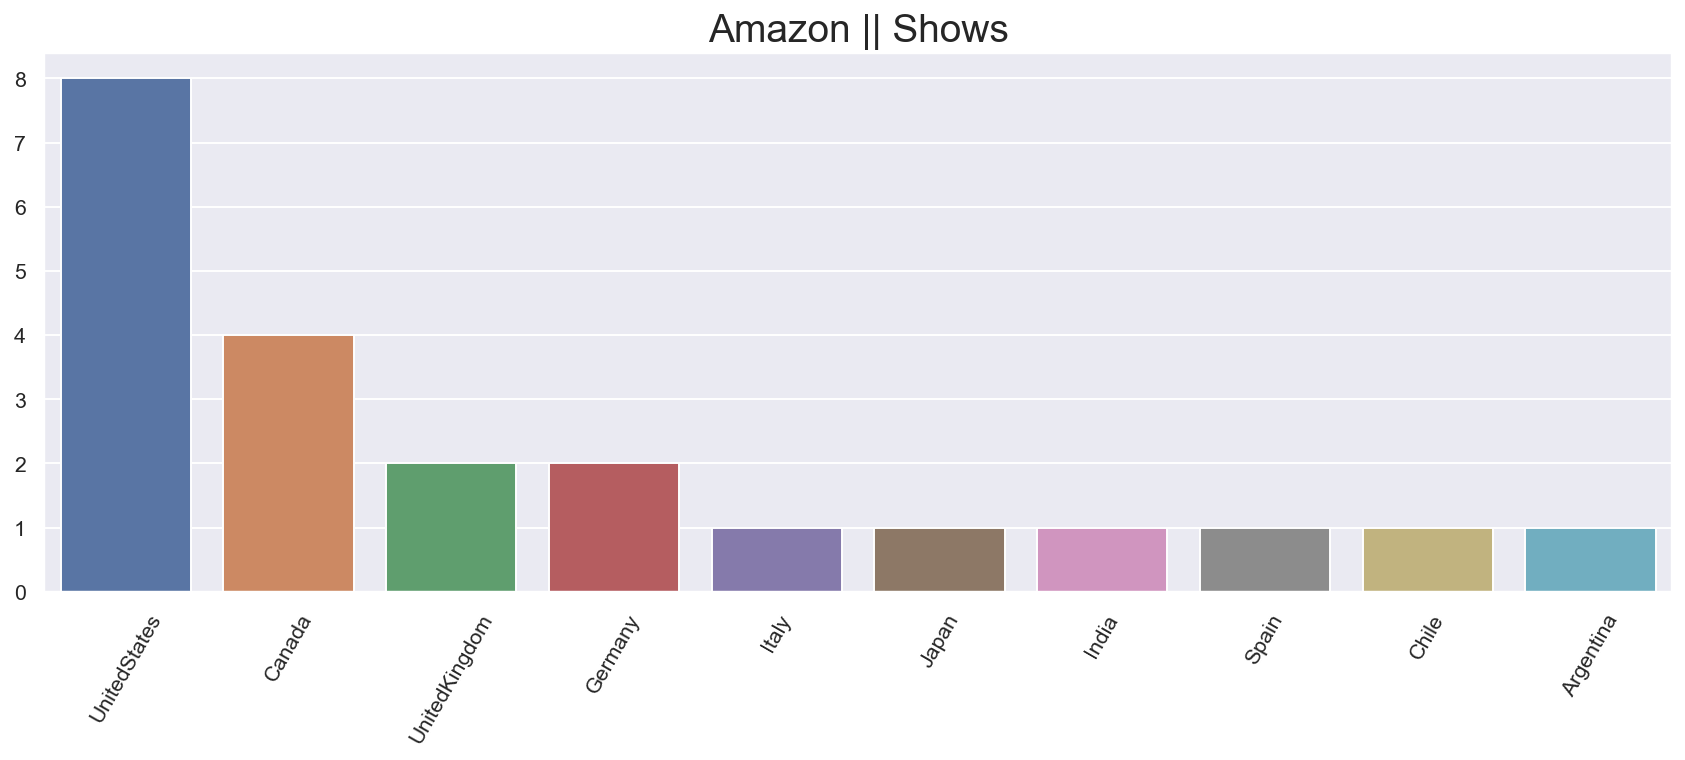

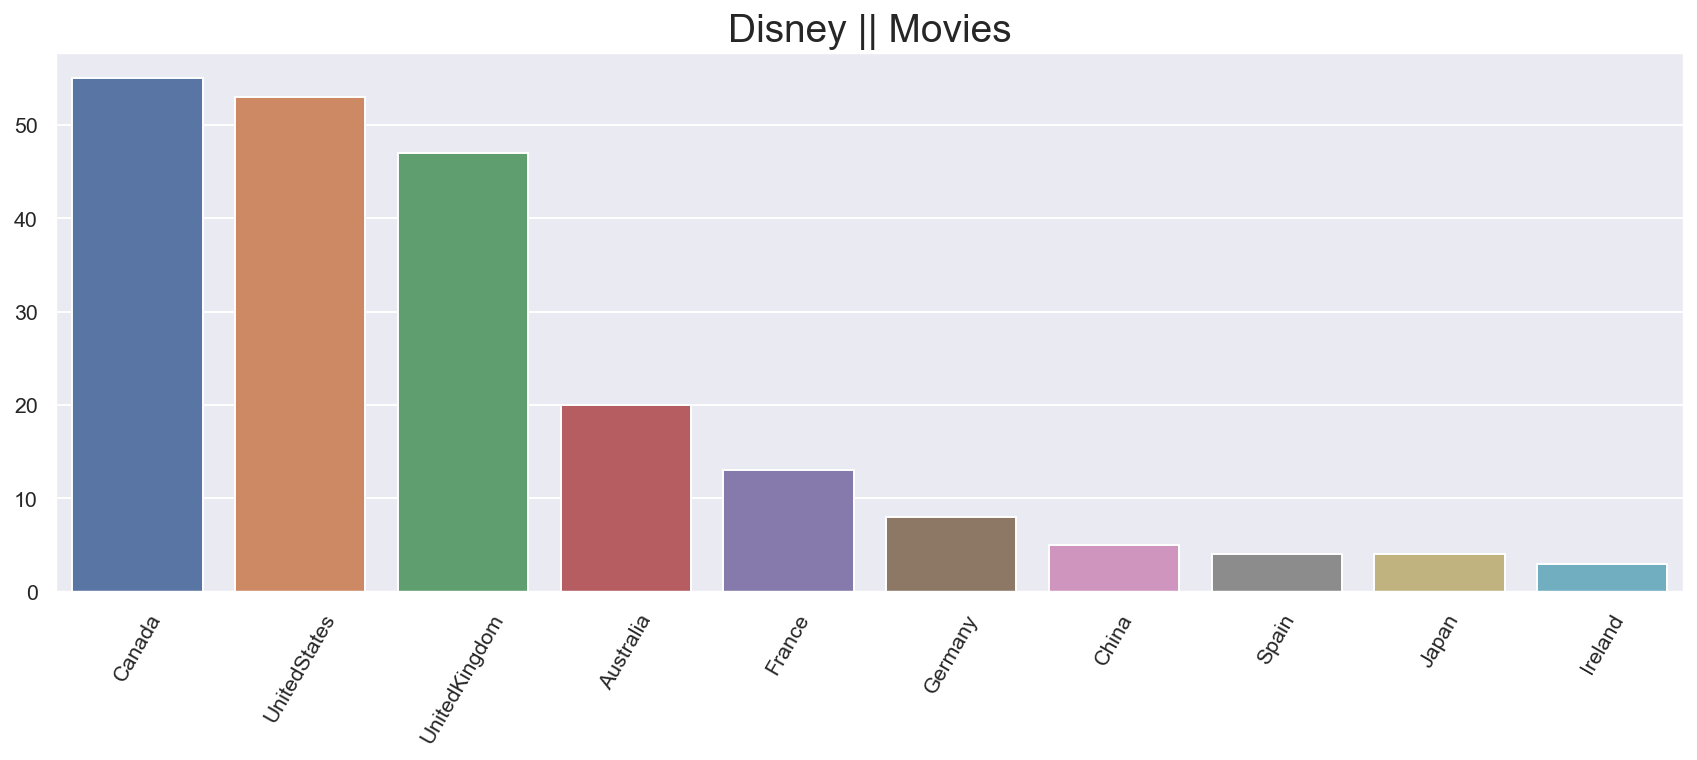

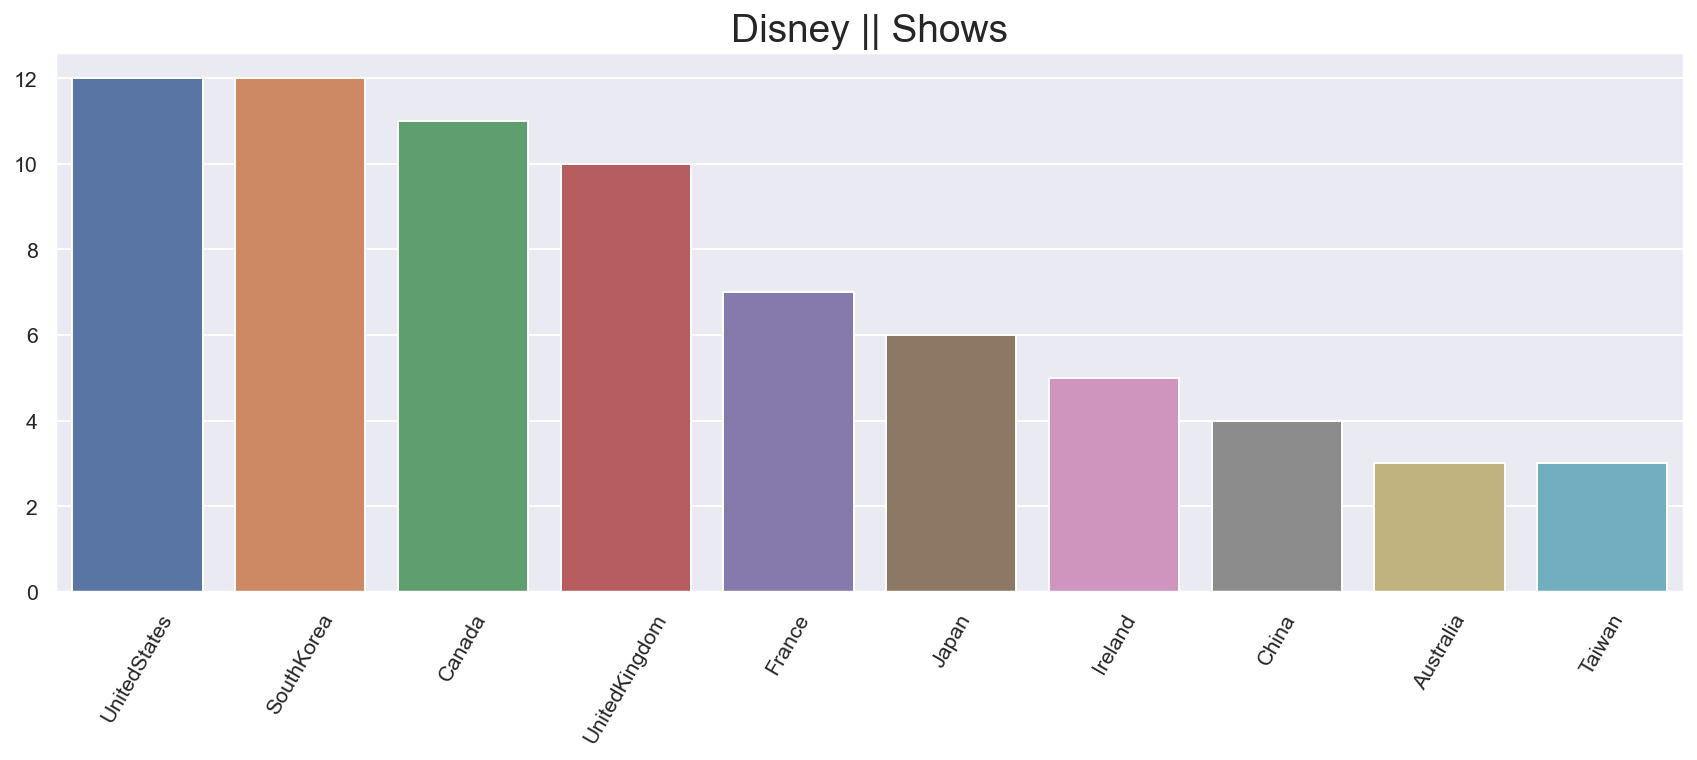

In [121]:
#Top 10 Content Creating Country's
#NETFLIX

countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no      
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Movies',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

countries={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Shows',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()


#AMAZON
countries={}
amazon_movies['country']=amazon_movies['country'].fillna('Unknown')
cou=list(amazon_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no      
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Movies',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

countries={}
amazon_shows['country']=amazon_shows['country'].fillna('Unknown')
cou=list(amazon_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Shows',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

#DISNEY
countries={}
disney_movies['country']=disney_movies['country'].fillna('Unknown')
cou=list(disney_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no      
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Movies',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

countries={}
disney_shows['country']=disney_shows['country'].fillna('Unknown')
cou=list(disney_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Shows',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

## Content BY Target Ages

### Amazon

In [122]:
#Content BY Target Ages
ratings_ages = {
    '13+': 'Older Kids',
    '18+': 'Early Adulthood',
    '7+': 'Kids',
    '16+': 'Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'NR': 'Adults',
    'TV-PG': 'Older Kids',
    'TV-14': 'Teens',
    'TV-G' : 'Kids',
    'PG-13' : 'Teens',
    'TV-MA' : 'Adults',
    'G' : 'Kids',
    'PG' : 'Older Kids',
    'NC-17' : 'Adults'}

# Feature Eng.
amazon['count'] = 1
amazon['first_country'] = amazon['country'].apply(lambda x: x.split(",")[0])
amazon['first_country'].head()
amazon['target_ages'] = amazon['rating'].replace(ratings_ages)
amazon['target_ages'].unique()

amazon['first_country'].head()

0            Canada
1             India
2     United States
3     United States
4    United Kingdom
Name: first_country, dtype: object

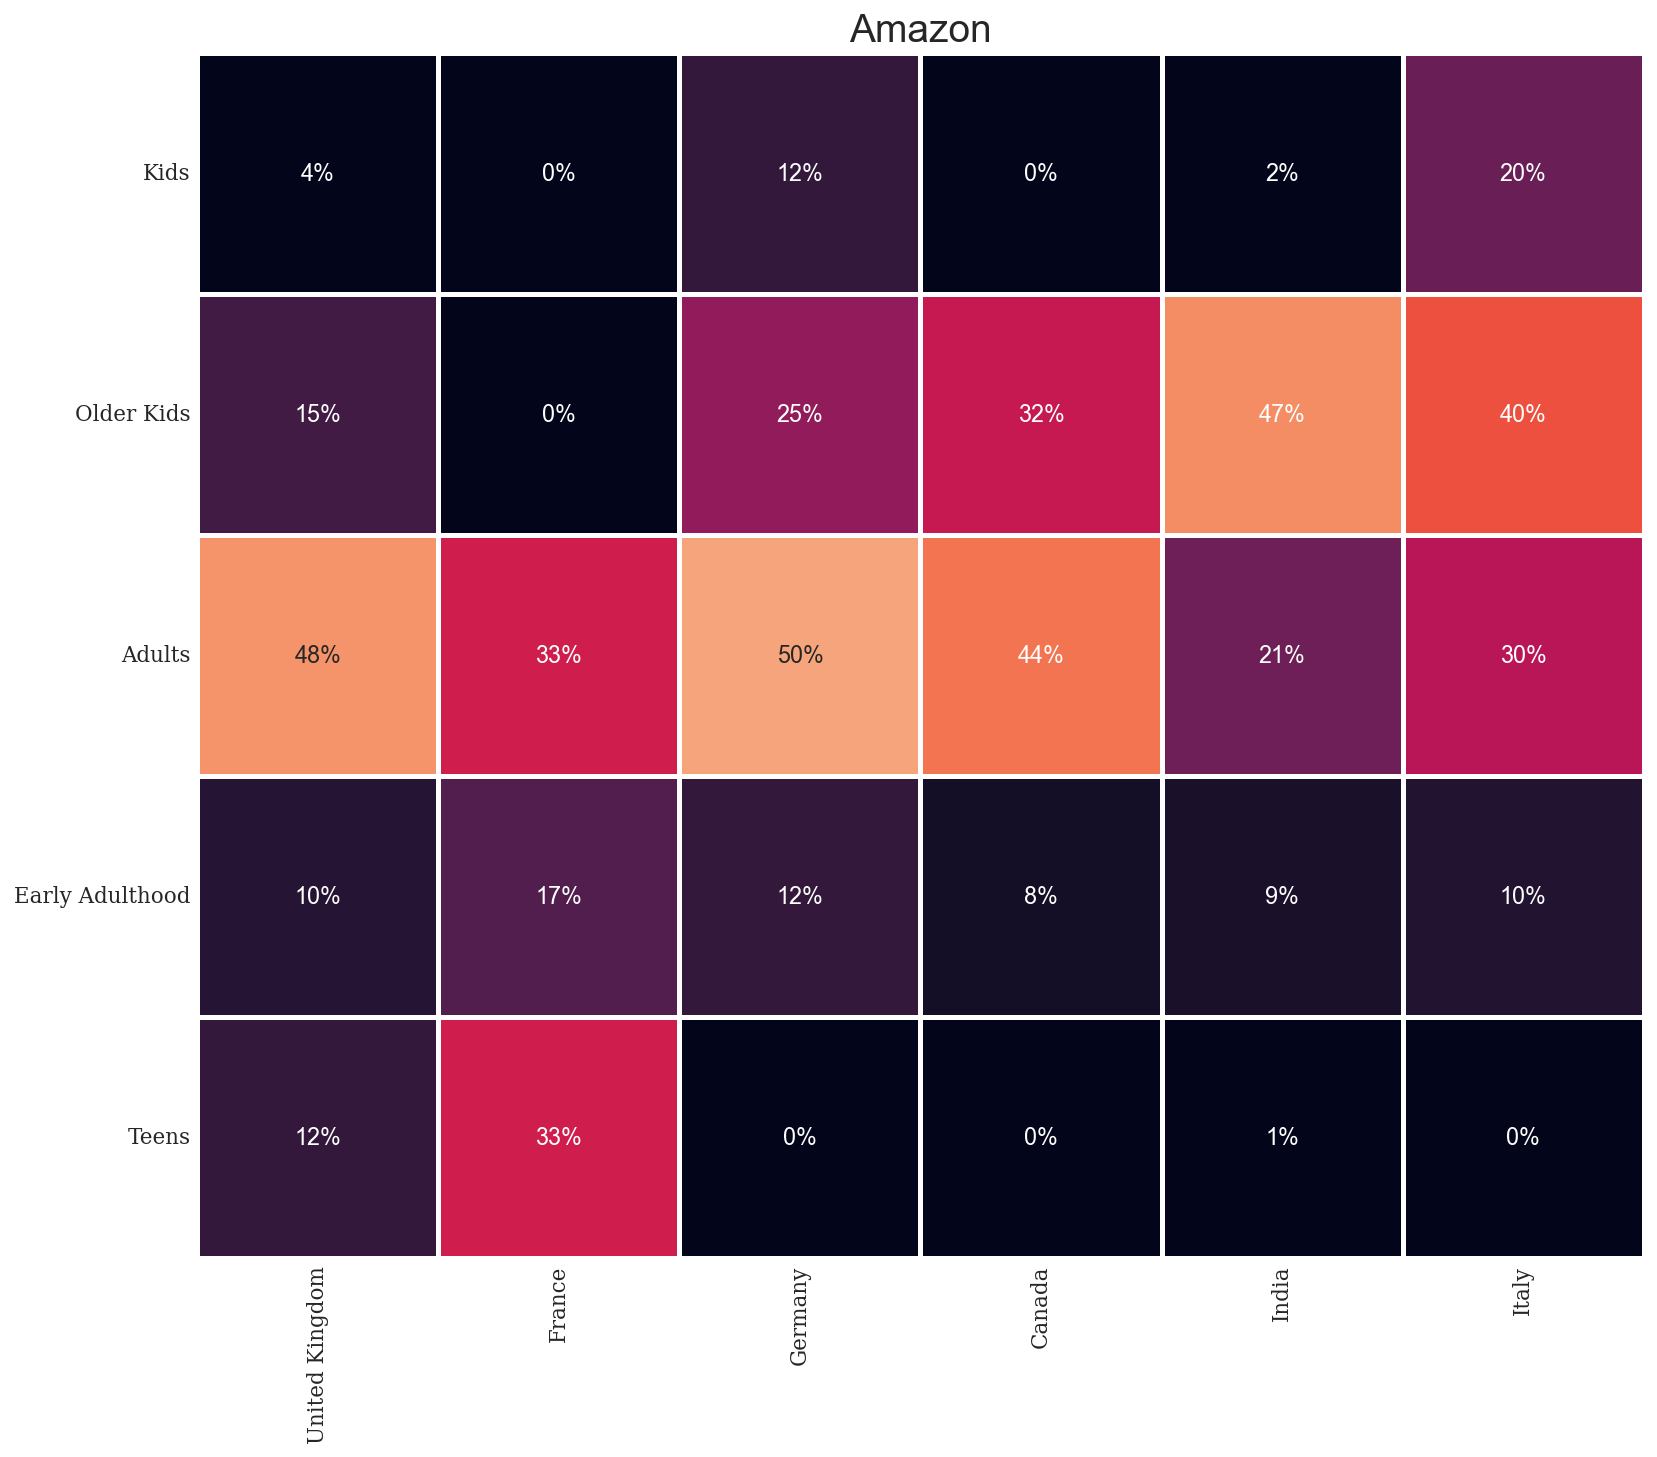

In [123]:
data = amazon.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

amazon_heatmap = amazon.loc[amazon['first_country'].isin(data)]

#Viz
amazon_heatmap = pd.crosstab(amazon_heatmap['first_country'],amazon_heatmap['target_ages'],normalize = "index").T
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order = ['United Kingdom', 'France', 'Germany', 'Canada', 'India', 'Italy']

age_order = ['Kids','Older Kids','Adults','Early Adulthood','Teens']

sns.heatmap(amazon_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.title('Amazon',size="20")

ax.spines['top'].set_visible(True)


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

### netflix

In [124]:
netflix_movies['rating'].unique().tolist()

country = {'United State',
          'France',
          'United Kingdom',
          'Germany',
          'Canada',
          'Belgium',
          'China',
          'Spain',
          'Japan',
          'India'}

ratings_ages = {'R': 'Adults',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'NR': 'Adults',
    'TV-PG': 'Older Kids',
    'TV-14': 'Teens',
    'TV-G' : 'Kids',
    'PG-13' : 'Teens',
    'TV-MA' : 'Adults',
    'G' : 'Kids',
    'PG' : 'Older Kids',
    'NC-17' : 'Adults',
    'TV-14' : 'Teens',
    'NR' : 'Adults'}

In [125]:
# Feature Eng.
netflix_movies['count'] = 1
netflix_movies['first_country'] = netflix_movies['country'].apply(lambda x: x.split(",")[0])
netflix_movies['first_country'].head()
netflix_movies['target_ages'] = netflix_movies['rating'].replace(ratings_ages)
netflix_movies['target_ages'].unique()

netflix_movies['first_country'].head()
netflix_movies['target_ages'].unique()

array(['Teens', 'Older Kids', 'Adults', 'Kids', '74 min', '84 min',
       '66 min', 'N/A', 'TV-Y7-FV', 'UR'], dtype=object)

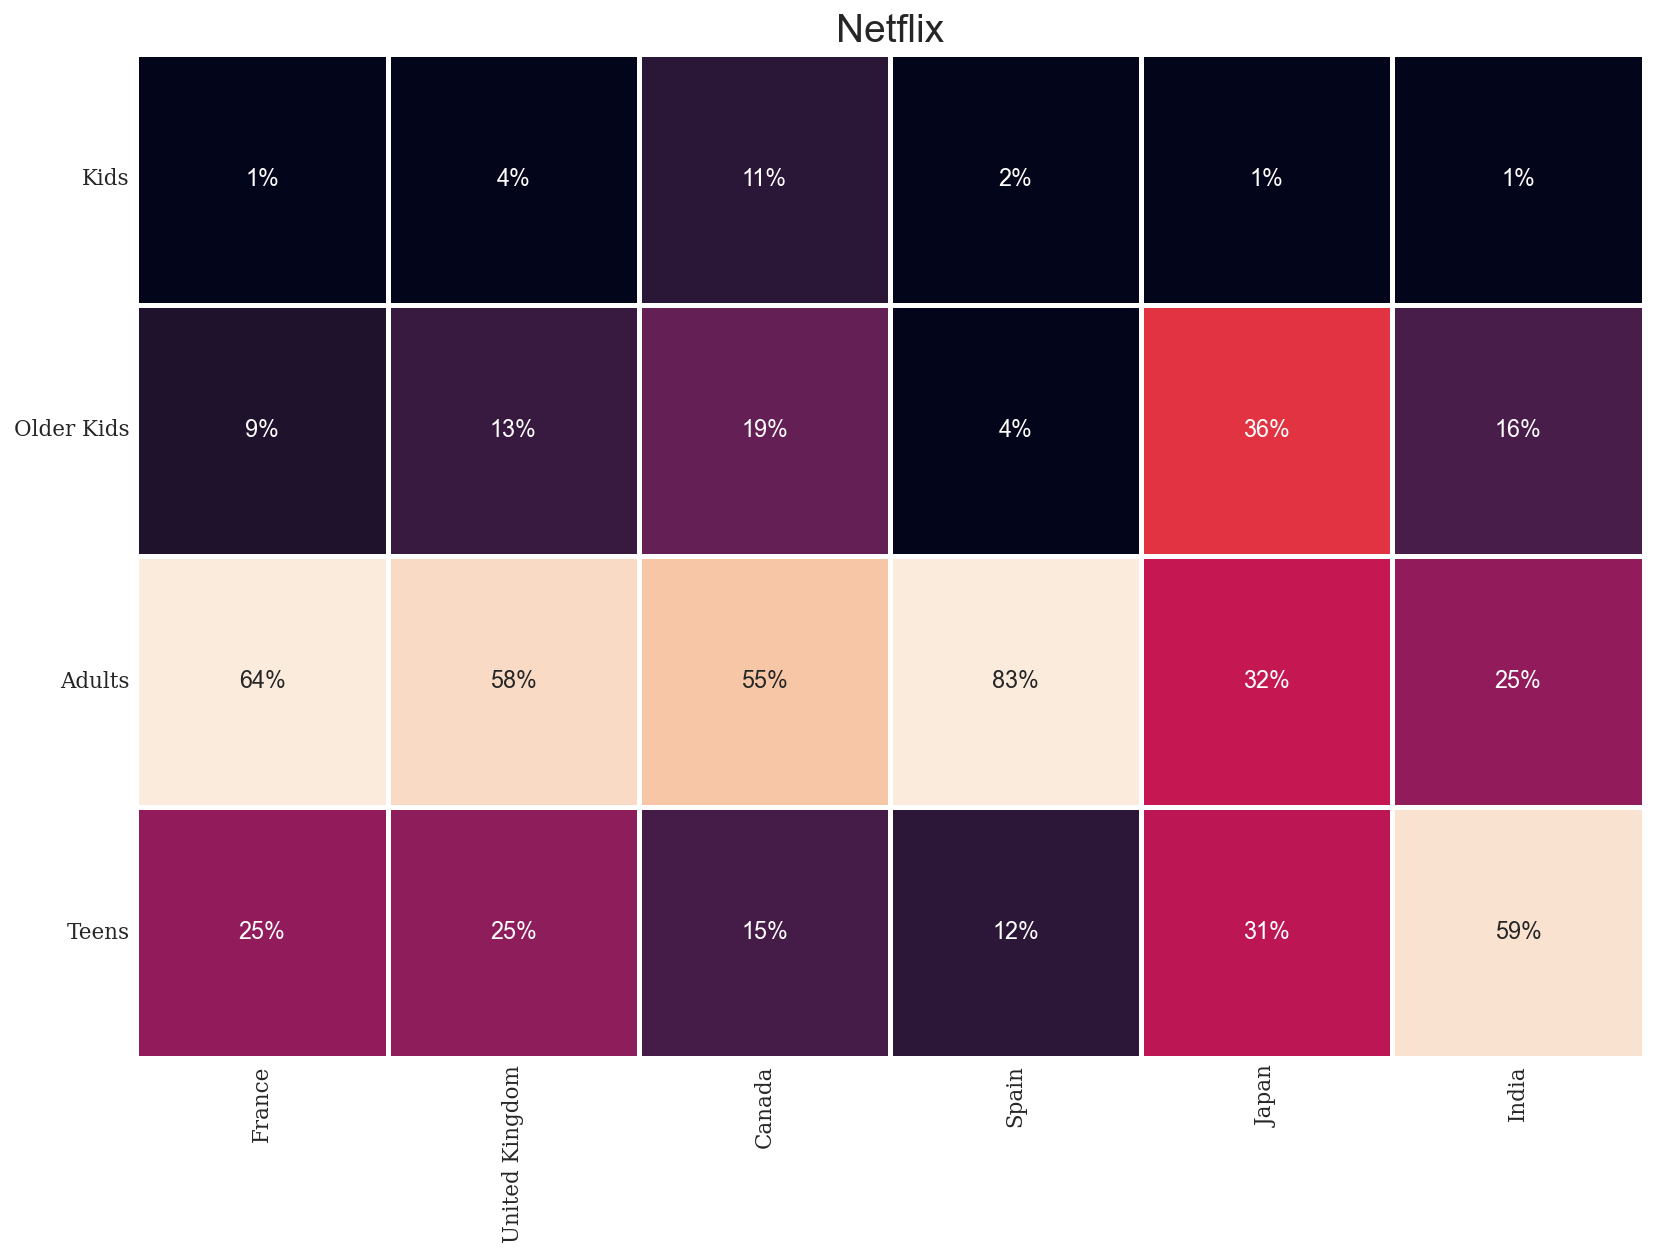

In [126]:
data = netflix_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

netflix_heatmap = netflix_movies.loc[netflix_movies['first_country'].isin(data)]

#Viz
netflix_heatmap = pd.crosstab(netflix_heatmap['first_country'],netflix_heatmap['target_ages'],normalize = "index").T
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order = ['France','United Kingdom','Canada','Spain','Japan','India']

age_order = ['Kids','Older Kids','Adults','Teens']

sns.heatmap(netflix_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.title('Netflix',size="20")

ax.spines['top'].set_visible(True)


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

#### Disney

In [127]:
disney['rating'].unique().tolist()

country = {'United State',
          'France',
          'United Kingdom',
        'Canada',
           'Australia',
           'Japan',
           'China',
           'Ireland',
           'Germany'}

ratings_ages = {'R': 'Adults',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'NR': 'Adults',
    'TV-PG': 'Older Kids',
    'TV-14': 'Teens',
    'TV-G' : 'Kids',
    'PG-13' : 'Teens',
    'TV-MA' : 'Adults',
    'G' : 'Kids',
    'PG' : 'Older Kids',
    'NC-17' : 'Adults',
    'TV-14' : 'Teens',
    'NR' : 'Adults'}

# Feature Eng.
disney['count'] = 1
disney['first_country'] = disney['country'].apply(lambda x: x.split(",")[0])
disney['first_country'].head()
disney['target_ages'] = disney['rating'].replace(ratings_ages)
disney['target_ages'].unique()

disney['first_country'].head()
disney['target_ages'].unique()

array(['Kids', 'Older Kids', 'N/A', 'Teens', 'TV-Y7-FV'], dtype=object)

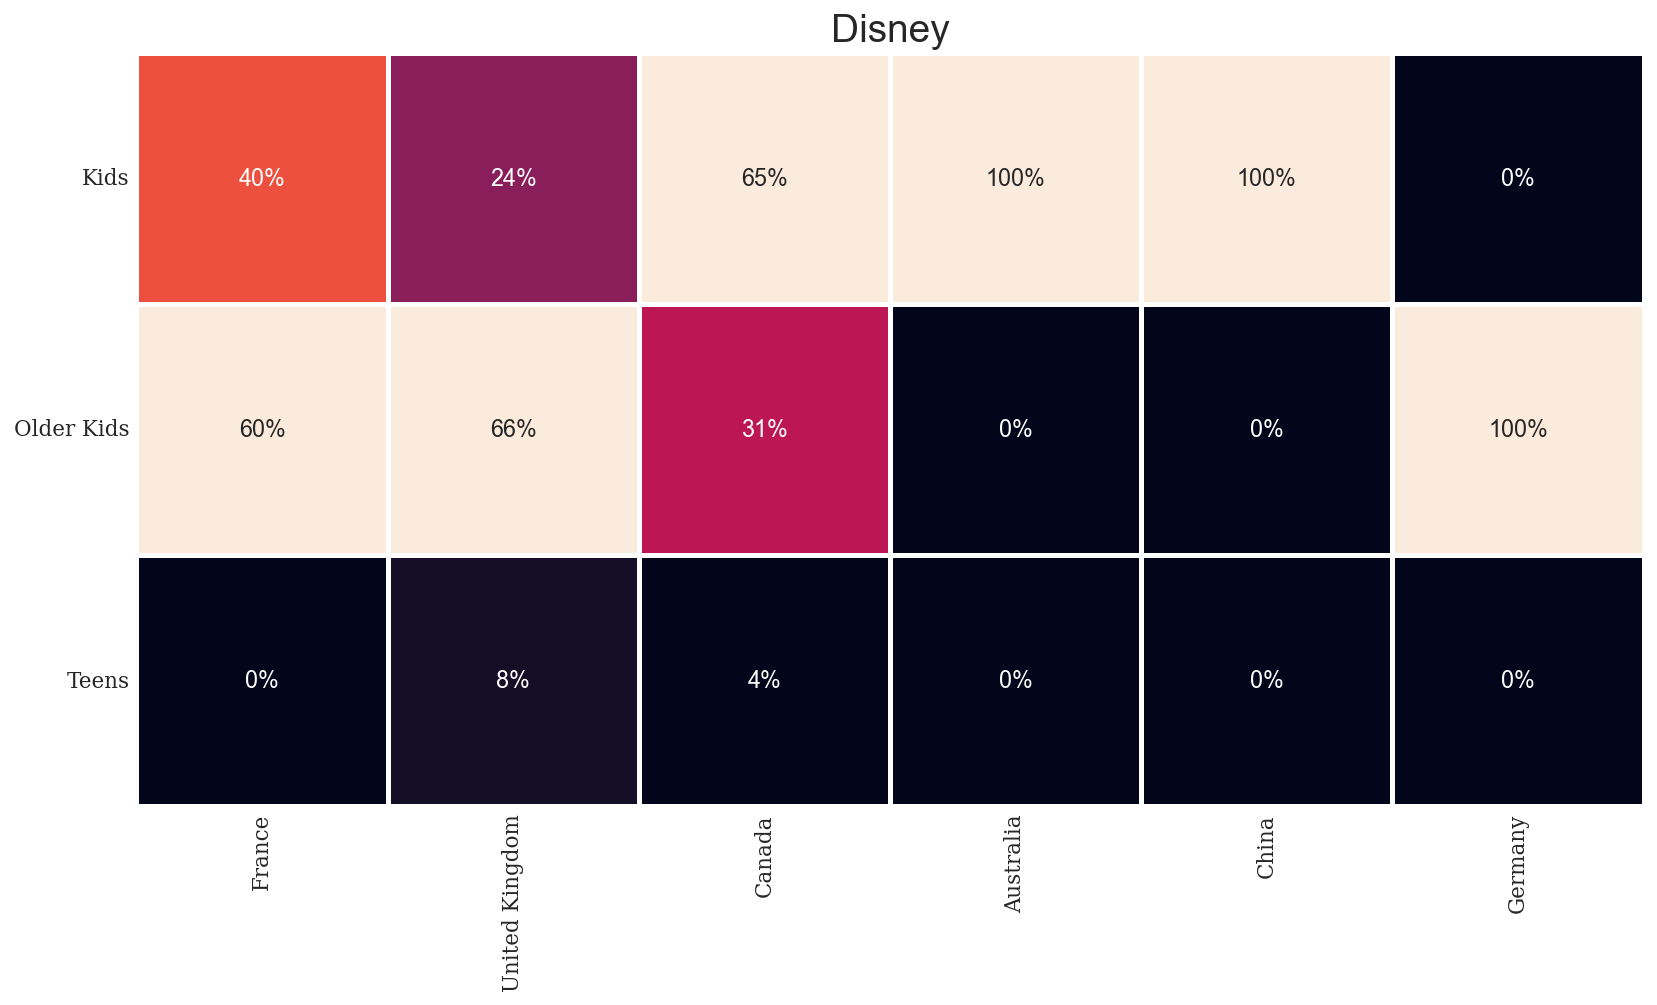

In [128]:
data = disney.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

disney_heatmap = disney.loc[disney['first_country'].isin(data)]

#Viz
disney_heatmap = pd.crosstab(disney_heatmap['first_country'],disney_heatmap['target_ages'],normalize = "index").T
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order = ['France','United Kingdom','Canada','Australia','China','Germany']

age_order = ['Kids','Older Kids','Teens']

sns.heatmap(disney_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.title('Disney',size="20")

ax.spines['top'].set_visible(True)


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()